<a id='toc'></a>

<div class="alert alert-block alert-info">
<center> <h1> ChocoDelight Factory </h1> </center> <br>
<center> <h2> Predicting Production Line Issues </h2> </center>
<center> <h3>   Catarina Reis </h3> </center>
<center> <h3>   June 2024 </h3> </center>

## Table of Contents

* [Import](#chapter0)
* [Exploratory Data Analysis (EDA)](#chapter1)
* [Data Preprocessing](#chapter2)
* [Predictive Modeling](#chapter4)
* [Feature Importance Analysis](#chapter5)
* [Casual Inference](#chapter6)


[Back to the start](#toc)

## Import <a class="anchor" id="chapter0"></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

[Back to the start](#toc)

## Exploratory Data Analysis (EDA) <a class="anchor" id="chapter1"></a>

In [22]:
# Define the path to the CSV file
file_path = r"C:\Users\ccrei\Downloads\BMW Case Study\Randomproduction_data.csv"

# Load the CSV file with the correct delimiter
prod_data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the DataFrame to verify
prod_data.head(10)

Record_ID        Date Cocoa_Roasting_Level Sugar_Granularity  \
0       WX1  07.08.2023          5,163574505              0,07   
1       WX2  04.08.2023          2,957405898              0,07   
2       WX3  05.08.2023          0,071302014              0,05   
3       WX4  07.08.2023          2,237458326              0,08   
4       WX5  03.08.2023          0,765161799              0,06   
5       WX6  05.08.2023           0,37462855              0,08   
6       WX7  05.08.2023          2,637340099              0,05   
7       WX8  07.08.2023          0,273732807              0,08   
8       WX9  02.08.2023          3,678924766              0,05   
9      WX10  03.08.2023          0,287744019              0,06   

  Milk_Solid_Percentage Nuts_Inclusion_Rate Texture_Smoothness  \
0           0,647463665         0,141156815        1821,319636   
1           0,601180098         0,279975881        1762,070866   
2           0,443866945         0,383971997         1520,03438   
3           0,508690093         0,842571283        1500,305535   
4           0,441458034         0,598622568         1710,83964   
5           0,688936412         0,503402924        1549,285079   
6           0,427712127         0,252658763        1866,330535   
7           0,488097173         0,546282416        1701,925357   
8           0,536392664          0,84320764        1598,466464   
9           0,550571945         0,553047444        1570,646051   

  Sweetness_Level Cocoa_Source_Check Flavor_Infusion Shelf_Life_Test  \
0     55740,59645        1,075330079     1,262623362     159,5459199   
1     55333,46311        0,856113672     1,501980217     151,6803038   
2     55149,53829        0,962238803     1,297385119       164,36938   
3     55428,80619        1,132808444      1,05327082     176,2085911   
4     55045,09769        0,835508833     1,892861493     164,4311177   
5     55709,37626        1,201675203     1,249841623     150,0488529   
6     55080,19237        0,746515906     1,072780502     173,8622726   
7     55054,87467        1,048730667     1,422334407     153,8704676   
8     55419,70098        0,927812071     1,804400306      154,936203   
9      55587,0744        0,731988041      1,16844818     157,0132283   

  Seal_Integrity Barcode_Scan_Success Box_Dimensions Label_Readability  \
0    0,986545831          0,977265908    5,112267385       80,06945999   
1    0,987549629          0,983469892    5,088392756        80,9716755   
2    0,888993014          0,980306854    5,026649551        79,1154479   
3    0,851913012           0,97906499    5,150749871       81,68573961   
4    0,710080061          0,985356593    5,116763392       79,59535666   
5    0,989927037          0,982436275    5,006067246       78,54995924   
6    0,991357939          0,959413844    5,029576592       77,03720169   
7    0,922968739          0,995503355    5,045972607       77,48515777   
8     0,70867542          0,974059269    5,155502793       80,99772792   
9     0,93882542           0,97959233    5,189849311       79,08427768   

  Nutritional_Info_Accuracy Chocolate_Glossiness Status  
0               1293,963757          0,898881859   Okay  
1                310,202915          0,804590017   Okay  
2              -1013,212906          0,904514459   Okay  
3               1137,751886          0,824946375   Okay  
4               654,3423936          0,908750023   Okay  
5               994,3553906          0,850950334   Okay  
6               1826,912314          0,836281281   Okay  
7               942,4873021          0,881745532   Okay  
8               2450,960152          0,890104227   Okay  
9               808,0304825          0,818514365   Okay

In [8]:
# Display the first few rows of the DataFrame to verify
prod_data.tail(10)

Record_ID        Date Cocoa_Roasting_Level Sugar_Granularity  \
9990    WX9991  02.08.2023          0,996894606              0,05   
9991    WX9992  03.08.2023          1,917704031              0,05   
9992    WX9993  04.08.2023           0,39207607              0,07   
9993    WX9994  03.08.2023          1,324992629              0,08   
9994    WX9995  05.08.2023          0,429831507              0,07   
9995    WX9996  03.08.2023          1,104636102              0,06   
9996    WX9997  05.08.2023          1,161184895              0,07   
9997    WX9998  02.08.2023          0,162406822              0,08   
9998    WX9999  03.08.2023           0,99434346              0,07   
9999   WX10000  02.08.2023          0,015012667              0,08   

     Milk_Solid_Percentage Nuts_Inclusion_Rate Texture_Smoothness  \
9990           0,619117049         0,375836255        1548,088239   
9991           0,489136454         0,521456391        1603,789817   
9992           0,505299508         0,656289637        1828,589057   
9993           0,248950107         0,379884938        1599,845691   
9994           0,491752925           0,6591319        1618,173125   
9995           0,626912788         0,868784654        1869,891362   
9996           0,437249582         0,119645726         1685,77231   
9997           0,371204478         0,231069623        1713,707698   
9998           0,545593387         0,833016966         1501,14337   
9999           0,325719002         0,157255768        1534,485184   

     Sweetness_Level Cocoa_Source_Check Flavor_Infusion Shelf_Life_Test  \
9990     55642,15844        1,207966357      1,11222835     168,2304299   
9991     55592,30089        0,907632206     1,171334698     171,4823578   
9992     55988,61152        0,909243573      1,15924539     177,0334306   
9993     55684,75768        0,762432282     1,634583855      171,625882   
9994     55754,14018        0,700710931     1,997306455     153,2158735   
9995     55081,71201        1,271053102     1,415129785     173,8725959   
9996     55814,22251        0,974619636     1,913570737     179,4913356   
9997     55596,71669        1,142433543     1,892445664      150,084258   
9998     55336,66193        1,220925851     1,811942778     164,7523224   
9999     55581,69045        0,767179117      1,47979192     151,0898743   

     Seal_Integrity Barcode_Scan_Success Box_Dimensions Label_Readability  \
9990    0,823577934          0,978019197    5,117993843       83,10740158   
9991    0,991769302          0,984245005    5,025450784       77,92791785   
9992    0,893824292           0,97578166    5,146052957       80,70815677   
9993    0,933325932          0,982729425    5,195909358       77,60907204   
9994     0,73036016          0,980411331    5,119626859       80,22955827   
9995    0,858679727          0,959582899    5,176055397       80,42645823   
9996    0,963019142          0,987679417    5,080644934       79,82049256   
9997    0,963955484          0,972694196    5,007496285       78,41556824   
9998    0,993864633          0,986097896    5,149497414       81,35273175   
9999    0,947414393          0,984153989    5,008419042       78,88409131   

     Nutritional_Info_Accuracy Chocolate_Glossiness    Status  
9990               2266,821117          0,900596182      Okay  
9991              -1501,867476          0,862913127  Not Okay  
9992                1480,50727           0,84966887      Okay  
9993               2216,856589          0,876581606      Okay  
9994               2031,639658          0,896618704      Okay  
9995               887,1552464          0,896949164      Okay  
9996               1004,900014          0,821483166      Okay  
9997               1611,890307           0,80852414      Okay  
9998                1440,10005          0,878825141      Okay  
9999              -785,8209137          0,843963002      Okay

### Initial Analysis

#### Types conversion

To ensure accurate analysis, we converted all features to numeric types except for Record_ID, Date, and Status. The Date feature was converted to a pandas datetime type, which is beneficial for time-series analysis and trend identification.

In [12]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record_ID                  10000 non-null  object
 1   Date                       10000 non-null  object
 2   Cocoa_Roasting_Level       10000 non-null  object
 3   Sugar_Granularity          10000 non-null  object
 4   Milk_Solid_Percentage      10000 non-null  object
 5   Nuts_Inclusion_Rate        10000 non-null  object
 6   Texture_Smoothness         10000 non-null  object
 7   Sweetness_Level            10000 non-null  object
 8   Cocoa_Source_Check         10000 non-null  object
 9   Flavor_Infusion            10000 non-null  object
 10  Shelf_Life_Test            10000 non-null  object
 11  Seal_Integrity             10000 non-null  object
 12  Barcode_Scan_Success       10000 non-null  object
 13  Box_Dimensions             10000 non-null  object
 14  Label_R

In [13]:
# Convert Date to datetime
prod_data['Date'] = pd.to_datetime(prod_data['Date'])

# List of columns to exclude from conversion
exclude_columns = ['Record_ID', 'Date', 'Status']

# List of columns to convert
columns_to_convert = [col for col in prod_data.columns if col not in exclude_columns]

# Ensure columns are strings before replacing commas
for column in columns_to_convert:
    prod_data[column] = prod_data[column].astype(str)

# Replace commas with dots and convert to numeric
for column in columns_to_convert:
    prod_data[column] = pd.to_numeric(prod_data[column].str.replace(',', '.').str.strip(), errors='coerce')

In [14]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Record_ID                  10000 non-null  object        
 1   Date                       10000 non-null  datetime64[ns]
 2   Cocoa_Roasting_Level       10000 non-null  float64       
 3   Sugar_Granularity          10000 non-null  float64       
 4   Milk_Solid_Percentage      10000 non-null  float64       
 5   Nuts_Inclusion_Rate        10000 non-null  float64       
 6   Texture_Smoothness         10000 non-null  float64       
 7   Sweetness_Level            10000 non-null  float64       
 8   Cocoa_Source_Check         10000 non-null  float64       
 9   Flavor_Infusion            9999 non-null   float64       
 10  Shelf_Life_Test            10000 non-null  float64       
 11  Seal_Integrity             10000 non-null  float64       
 12  Barco

#### Descriptive statistics

In [16]:
# List of metric features to convert and analyze
metric_features = [col for col in prod_data.columns if col not in exclude_columns]

# Descriptive statistics for the metric features
prod_data[metric_features].describe().T

count          mean         std           min  \
Cocoa_Roasting_Level       10000.0      1.250968    1.252881      0.000148   
Sugar_Granularity          10000.0      0.064979    0.009566      0.050000   
Milk_Solid_Percentage      10000.0      0.500247    0.101043      0.140725   
Nuts_Inclusion_Rate        10000.0      0.505341    0.315833      0.100075   
Texture_Smoothness         10000.0   1711.859464  121.288814   1500.054160   
Sweetness_Level            10000.0  55502.343379  289.512870  55000.047540   
Cocoa_Source_Check         10000.0      0.998630    0.174468      0.700088   
Flavor_Infusion             9999.0      1.501989    0.286758      1.000280   
Shelf_Life_Test            10000.0    164.954362    8.626869    150.009933   
Seal_Integrity             10000.0      0.850813    0.086636      0.700069   
Barcode_Scan_Success       10000.0      0.979960    0.010010      0.940292   
Box_Dimensions              9999.0      5.099828    0.057769      5.000049   
Label_Readability          10000.0     79.968821    1.497610     74.269995   
Nutritional_Info_Accuracy   9999.0    902.424694  991.978618  -2848.043381   
Chocolate_Glossiness       10000.0      0.860546    0.034693      0.800001   

                                    25%           50%           75%  \
Cocoa_Roasting_Level           0.370444      0.872016      1.712973   
Sugar_Granularity              0.060000      0.060000      0.070000   
Milk_Solid_Percentage          0.432161      0.500338      0.569522   
Nuts_Inclusion_Rate            0.303842      0.504503      0.704306   
Texture_Smoothness          1607.449017   1711.704294   1818.364024   
Sweetness_Level            55253.836740  55498.622650  55756.963740   
Cocoa_Source_Check             0.847592      0.995851      1.151397   
Flavor_Infusion                1.256135      1.501103      1.748772   
Shelf_Life_Test              157.415442    164.995747    172.345998   
Seal_Integrity                 0.775187      0.851943      0.924882   
Barcode_Scan_Success           0.973271      0.980016      0.986624   
Box_Dimensions                 5.049760      5.099021      5.149302   
Label_Readability             78.950887     79.974011     80.964107   
Nutritional_Info_Accuracy    231.220375    895.431199   1577.245289   
Chocolate_Glossiness           0.830343      0.860982      0.890722   

                                    max  
Cocoa_Roasting_Level          11.424465  
Sugar_Granularity              0.080000  
Milk_Solid_Percentage          0.893850  
Nuts_Inclusion_Rate           22.000000  
Texture_Smoothness          1919.941845  
Sweetness_Level            55999.895040  
Cocoa_Source_Check             1.299936  
Flavor_Infusion                1.999703  
Shelf_Life_Test              179.997359  
Seal_Integrity                 0.999975  
Barcode_Scan_Success           1.015199  
Box_Dimensions                 5.199983  
Label_Readability             85.752384  
Nutritional_Info_Accuracy   4595.193693  
Chocolate_Glossiness           0.919995

In [17]:
# Descriptive statistics for the date feature
prod_data['Date'].describe()

count                         10000
mean     2023-04-08 13:12:17.280000
min             2023-01-08 00:00:00
25%             2023-02-08 00:00:00
50%             2023-04-08 00:00:00
75%             2023-06-08 00:00:00
max             2023-07-08 00:00:00
Name: Date, dtype: object

In [18]:
# List of non-metric features to convert and analyze
non_metric_features = ['Record_ID', 'Status']

# Descriptive statistics for the metric features
prod_data[non_metric_features].describe(include='all').T

count unique   top  freq
Record_ID  10000  10000   WX1     1
Status     10000      2  Okay  9198

In [19]:
# Descriptive statistics for the metric features
prod_data['Date'].describe().T

count                         10000
mean     2023-04-08 13:12:17.280000
min             2023-01-08 00:00:00
25%             2023-02-08 00:00:00
50%             2023-04-08 00:00:00
75%             2023-06-08 00:00:00
max             2023-07-08 00:00:00
Name: Date, dtype: object

#### Percentage of missing values in each feature

In [21]:
round((prod_data.isna().sum() / len(prod_data)) * 100,2)

Record_ID                    0.00
Date                         0.00
Cocoa_Roasting_Level         0.00
Sugar_Granularity            0.00
Milk_Solid_Percentage        0.00
Nuts_Inclusion_Rate          0.00
Texture_Smoothness           0.00
Sweetness_Level              0.00
Cocoa_Source_Check           0.00
Flavor_Infusion              0.01
Shelf_Life_Test              0.00
Seal_Integrity               0.00
Barcode_Scan_Success         0.00
Box_Dimensions               0.01
Label_Readability            0.00
Nutritional_Info_Accuracy    0.01
Chocolate_Glossiness         0.00
Status                       0.00
dtype: float64

##### Display observations where missing values were found

In [23]:
# List of columns with missing values
columns_with_missing_values = ['Flavor_Infusion', 'Box_Dimensions', 'Nutritional_Info_Accuracy']

# Filter the rows with missing values for the specified columns
observations_with_missing_values = prod_data[prod_data[columns_with_missing_values].isnull().any(axis=1)]

# Display the filtered DataFrame
print("Observations with Missing Values:")
print(observations_with_missing_values)

Observations with Missing Values:
     Record_ID       Date  Cocoa_Roasting_Level  Sugar_Granularity  \
2995    WX2996 2023-05-08              0.007427               0.07   
3031    WX3032 2023-03-08              0.207512               0.08   
7662    WX7663 2023-03-08              0.651256               0.08   

      Milk_Solid_Percentage  Nuts_Inclusion_Rate  Texture_Smoothness  \
2995               0.387836             0.638218         1547.259571   
3031               0.754586             0.342460         1535.101726   
7662               0.672615             0.820140         1886.715608   

      Sweetness_Level  Cocoa_Source_Check  Flavor_Infusion  Shelf_Life_Test  \
2995      55244.52809            1.140760              NaN       174.922383   
3031      55943.18253            1.249450         1.669826       170.942080   
7662      55086.34831            1.230216         1.515587       150.635516   

      Seal_Integrity  Barcode_Scan_Success  Box_Dimensions  Label_Readability  

##### Manually checking for more missing value

When searching for missing values in the most direct way, we didn't find any, but when looking manually to each column, a missing value was identified.

In [26]:
prod_data.loc[prod_data['Record_ID'] == 'WX3032', 'Box_Dimensions']

3031   NaN
Name: Box_Dimensions, dtype: float64

In [27]:
# Replace the "Box_Dimensions" value for the record with "Record_ID" 3031 with NaN
prod_data.loc[prod_data['Record_ID'] == 'WX3031', 'Box_Dimensions'] = np.nan

# Verify the change
print(prod_data.loc[prod_data['Record_ID'] == 'WX3032', 'Box_Dimensions'])

3031   NaN
Name: Box_Dimensions, dtype: float64


In [28]:
prod_data.loc[prod_data['Record_ID'] == 'WX3032', 'Box_Dimensions']

3031   NaN
Name: Box_Dimensions, dtype: float64

#### Index

If we were only using the dataset for production line, we could remove the feature 'Record_ID' and use the default index to identify each record. Since we will later use a different dataset, we will need the record ID information to associate each record correctly between both datasets.

#### Duplicates

To check for duplicated records, we first consider the feature 'Record_ID' and then we tried without this feaute. In both cases, no duplicated records were found.

In [33]:
prod_data.duplicated().sum()

0

In [34]:
# Check for duplicates ignoring the "Record_ID" column
#prod_data.drop(columns=['Record_ID']).duplicated().sum()

### Analyze the distribution of measurements for each station

#### Data coherence

Checking data coherence involves verifying that the data makes sense given the context and constraints of the scenario. For the ChocoDelight Factory, coherence checks include verifying that numeric values fall within reasonable ranges, that dates are valid, and that related metrics are consistent with each other.

#### a) Range Checks for Numeric Values

First, let's ensure that values for metrics like Cocoa_Roasting_Level, Sugar_Granularity, and Milk_Solid_Percentage fall within expected ranges.

##### Cacoa Roasting Level

In [41]:
prod_data['Cocoa_Roasting_Level'].describe()

count    10000.000000
mean         1.250968
std          1.252881
min          0.000148
25%          0.370444
50%          0.872016
75%          1.712973
max         11.424465
Name: Cocoa_Roasting_Level, dtype: float64

Min Value of Cocoa Roasting Level: 0.000148315
Max Value of Cocoa Roasting Level: 11.42446457


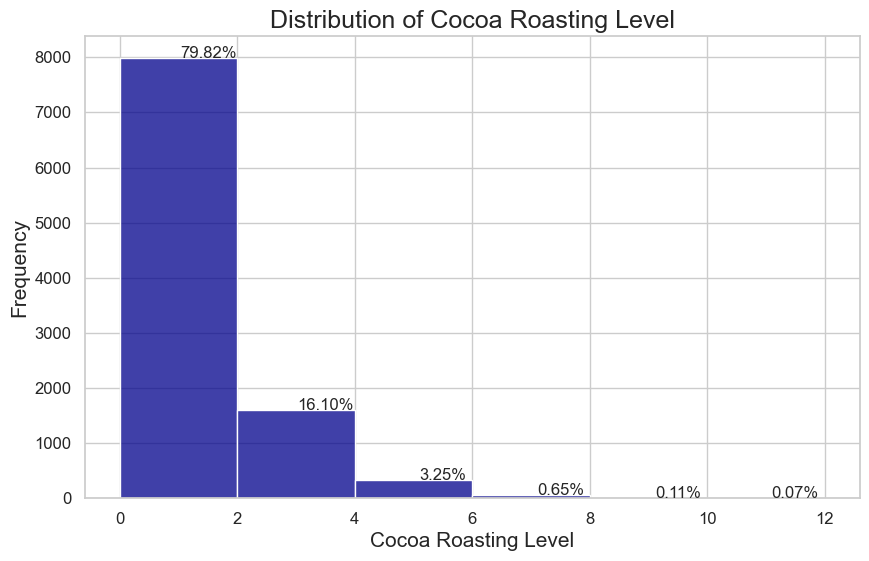

In [42]:
# Calculate min and max values
min_roasting_level = prod_data['Cocoa_Roasting_Level'].min()
max_roasting_level = prod_data['Cocoa_Roasting_Level'].max()

print(f"Min Value of Cocoa Roasting Level: {min_roasting_level}")
print(f"Max Value of Cocoa Roasting Level: {max_roasting_level}")

# Define bins and calculate histogram
bins = [0, 2, 4, 6, 8, 10, 12]
hist, bin_edges = np.histogram(prod_data['Cocoa_Roasting_Level'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Cocoa Roasting Level
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Cocoa_Roasting_Level'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Cocoa Roasting Level', fontsize=18)
plt.xlabel('Cocoa Roasting Level', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + 1.5, hist[i] + 0.5, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Cocoa_Roasting_Level metric ranges from 0 to 12, representing varying degrees of roast from light to very dark. Since we don't have more information about this feature, we will assume that levels 0-3 are light roasts, 4-6 are medium roasts, 7-9 are dark roasts, and 10-12 are very dark roasts. This metric impacts the flavor profile, with light roasts preserving original flavors and dark roasts developing richer, more intense flavors. The distribution plot shows a significant focus on lighter roasts (79.82%), indicating a strong preference for nuanced cocoa flavors in their production.

##### Sugar Granularity

In [45]:
prod_data['Sugar_Granularity'].describe()

count    10000.000000
mean         0.064979
std          0.009566
min          0.050000
25%          0.060000
50%          0.060000
75%          0.070000
max          0.080000
Name: Sugar_Granularity, dtype: float64

Min Value of Sugar Granularity: 0.05
Max Value of Sugar Granularity: 0.08


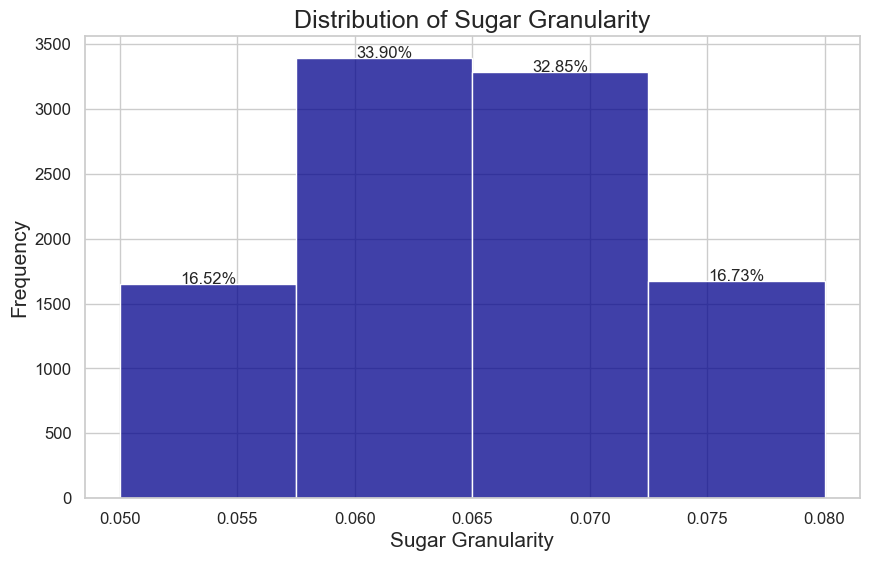

In [46]:
# Calculate min and max values
min_sugar_granularity = prod_data['Sugar_Granularity'].min()
max_sugar_granularity = prod_data['Sugar_Granularity'].max()

print(f"Min Value of Sugar Granularity: {min_sugar_granularity}")
print(f"Max Value of Sugar Granularity: {max_sugar_granularity}")

# Define bins and calculate histogram
bins = np.linspace(min_sugar_granularity, max_sugar_granularity, num=5)  # Create 4 bins within the range
hist, bin_edges = np.histogram(prod_data['Sugar_Granularity'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Sugar Granularity
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Sugar_Granularity'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Sugar Granularity', fontsize=18)
plt.xlabel('Sugar Granularity', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 0.1, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Sugar_Granularity metric ranges from 0.05 to 0.08. The distribution of Sugar_Granularity indicates strong quality control in the ChocoDelight Factory's production process. The majority of sugar granules (33.90%) fall within the 0.060 - 0.065 range, with 32.85% in the 0.065 - 0.070 range, demonstrating consistent control over granularity. Less common sizes, 0.050 - 0.055 and 0.070 - 0.080, each contain around 16.5-17% of the observations. This tight distribution ensures a uniform texture in the final chocolate product, reflecting the factory's commitment to high quality.

##### Milk Solid Percentage

In [49]:
prod_data['Milk_Solid_Percentage'].describe()

count    10000.000000
mean         0.500247
std          0.101043
min          0.140725
25%          0.432161
50%          0.500338
75%          0.569522
max          0.893850
Name: Milk_Solid_Percentage, dtype: float64

Min Value of Milk Solid Percentage: 0.140725317
Max Value of Milk Solid Percentage: 0.893850298


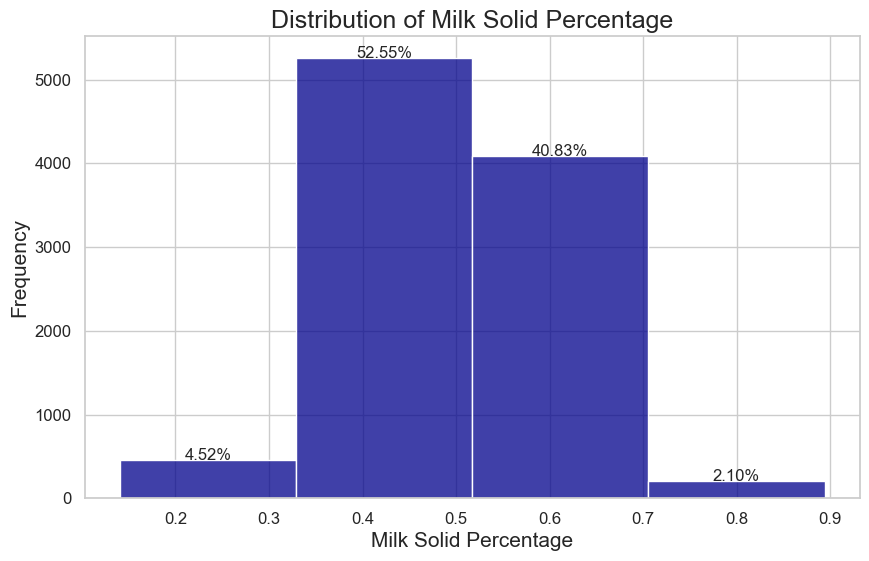

In [50]:
# Calculate min and max values for Milk_Solid_Percentage
min_milk_solid_percentage = prod_data['Milk_Solid_Percentage'].min()
max_milk_solid_percentage = prod_data['Milk_Solid_Percentage'].max()

print(f"Min Value of Milk Solid Percentage: {min_milk_solid_percentage}")
print(f"Max Value of Milk Solid Percentage: {max_milk_solid_percentage}")

# Define bins and calculate histogram for Milk_Solid_Percentage
bins = np.linspace(min_milk_solid_percentage, max_milk_solid_percentage, num=5)  # Create 4 bins within the range
hist, bin_edges = np.histogram(prod_data['Milk_Solid_Percentage'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Milk Solid Percentage
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Milk_Solid_Percentage'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Milk Solid Percentage', fontsize=18)
plt.xlabel('Milk Solid Percentage', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 0.1, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

Since it was not specified that ChocoDelight Factory is exclusively a milk chocolate factory, we can assume it produces a variety of chocolates. The Milk_Solid_Percentage ranges from 14% to 89%, indicating diverse chocolate production. Most products have high milk solid content (30-70%), typical for milk chocolates. Less common ranges below 30% and above 70% suggest less production of chocolates with less milk.

##### Nuts Inclusion Rate

In [53]:
prod_data['Nuts_Inclusion_Rate'].describe()

count    10000.000000
mean         0.505341
std          0.315833
min          0.100075
25%          0.303842
50%          0.504503
75%          0.704306
max         22.000000
Name: Nuts_Inclusion_Rate, dtype: float64

According to the descriptive statistics, we clearly have an outlier here (Nuts_Inclusion_Rate = 22). Thus, we will not display this observation in the following histogram.

Min Value of Nuts Inclusion Rate: 0.100074614
Max Value of Nuts Inclusion Rate: 22.0


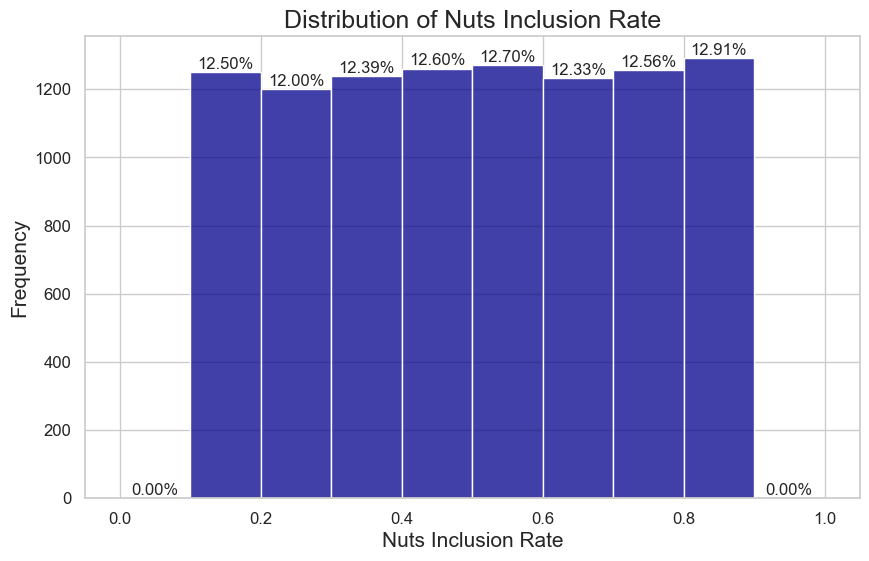

In [55]:
# Calculate min and max values for Nuts_Inclusion_Rate
min_nuts_inclusion_rate = prod_data['Nuts_Inclusion_Rate'].min()
max_nuts_inclusion_rate = prod_data['Nuts_Inclusion_Rate'].max()

print(f"Min Value of Nuts Inclusion Rate: {min_nuts_inclusion_rate}")
print(f"Max Value of Nuts Inclusion Rate: {max_nuts_inclusion_rate}")

# Define bins to capture both main distribution and outliers
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1]
hist, bin_edges = np.histogram(prod_data['Nuts_Inclusion_Rate'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Nuts Inclusion Rate
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Nuts_Inclusion_Rate'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Nuts Inclusion Rate', fontsize=18)
plt.xlabel('Nuts Inclusion Rate', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The distribution of Nuts_Inclusion_Rate shows that the majority of chocolate products have a nuts inclusion rate between 20% and 80%, with nearly equal distribution in this range. This suggests a balanced approach to including nuts in the product line. The lower inclusion rates (0-20%) and higher inclusion rates (80-100%) are less common, indicating that these are likely specialty products or limited editions. 







##### Texture_Smoothness

In [58]:
prod_data['Texture_Smoothness'].describe()

count    10000.000000
mean      1711.859464
std        121.288814
min       1500.054160
25%       1607.449017
50%       1711.704294
75%       1818.364024
max       1919.941845
Name: Texture_Smoothness, dtype: float64

Min Value of Texture Smoothness: 1500.05416
Max Value of Texture Smoothness: 1919.941845


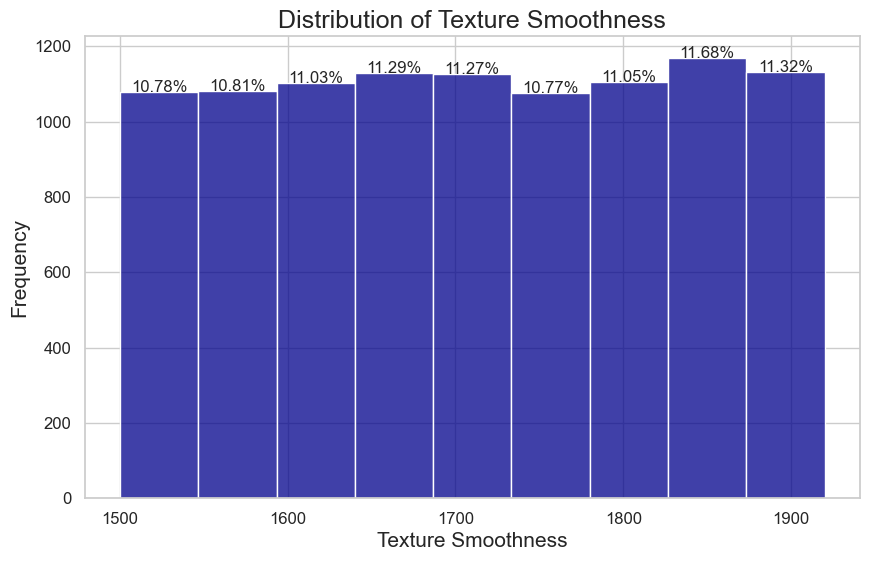

In [59]:
# Calculate min and max values for Texture_Smoothness
min_texture_smoothness = prod_data['Texture_Smoothness'].min()
max_texture_smoothness = prod_data['Texture_Smoothness'].max()

print(f"Min Value of Texture Smoothness: {min_texture_smoothness}")
print(f"Max Value of Texture Smoothness: {max_texture_smoothness}")

# Define bins and calculate histogram for Texture_Smoothness
bins = np.linspace(min_texture_smoothness, max_texture_smoothness, num=10)
hist, bin_edges = np.histogram(prod_data['Texture_Smoothness'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Texture Smoothness
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Texture_Smoothness'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Texture Smoothness', fontsize=18)
plt.xlabel('Texture Smoothness', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 0.1, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Texture_Smoothness values, ranging from 1500 to 1920, likely represents a smoothness scale used by the factory. The stable distribution across this range indicates that the factory produces chocolate with consistently smooth textures.

##### Sweetness Level

In [62]:
prod_data['Sweetness_Level'].describe()

count    10000.000000
mean     55502.343379
std        289.512870
min      55000.047540
25%      55253.836740
50%      55498.622650
75%      55756.963740
max      55999.895040
Name: Sweetness_Level, dtype: float64

Min Value of Sweetness Level: 55000.04754
Max Value of Sweetness Level: 55999.89504


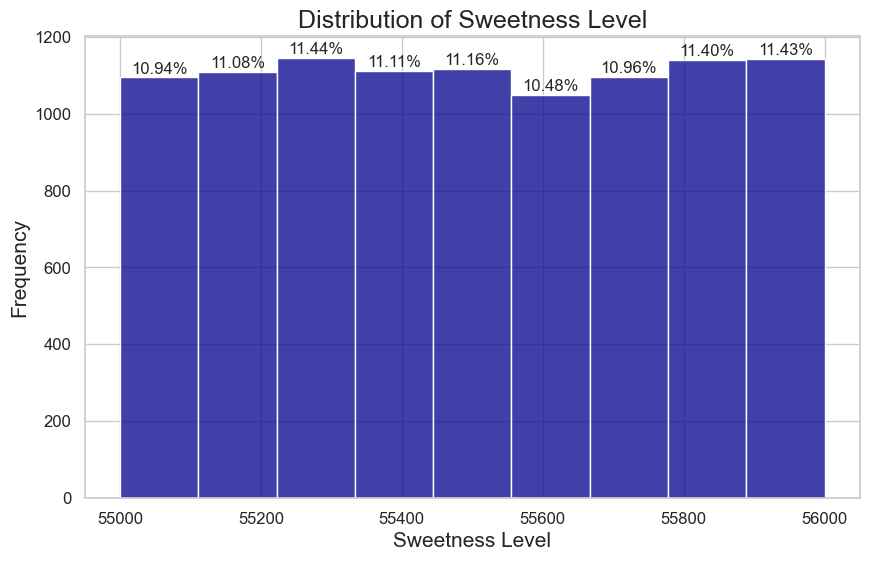

In [63]:
# Calculate min and max values for Sweetness_Level
min_sweetness_level = prod_data['Sweetness_Level'].min()
max_sweetness_level = prod_data['Sweetness_Level'].max()

print(f"Min Value of Sweetness Level: {min_sweetness_level}")
print(f"Max Value of Sweetness Level: {max_sweetness_level}")

# Define bins and calculate histogram for Sweetness_Level
bins = np.linspace(min_sweetness_level, max_sweetness_level, num=10)
hist, bin_edges = np.histogram(prod_data['Sweetness_Level'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Sweetness Level
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Sweetness_Level'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Sweetness Level', fontsize=18)
plt.xlabel('Sweetness Level', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Sweetness_Level values, ranging from 55000 to 56000, likely represent a scale used by the factory to measure sweetness intensity. The uniform distribution across this range indicates that the factory maintains a controlled and consistent sweetness level in its chocolate products.

##### Cocoa Source Check


In [66]:
prod_data['Cocoa_Source_Check'].describe()

count    10000.000000
mean         0.998630
std          0.174468
min          0.700088
25%          0.847592
50%          0.995851
75%          1.151397
max          1.299936
Name: Cocoa_Source_Check, dtype: float64

Min Value of Cocoa Source Check: 0.700087564
Max Value of Cocoa Source Check: 1.29993575


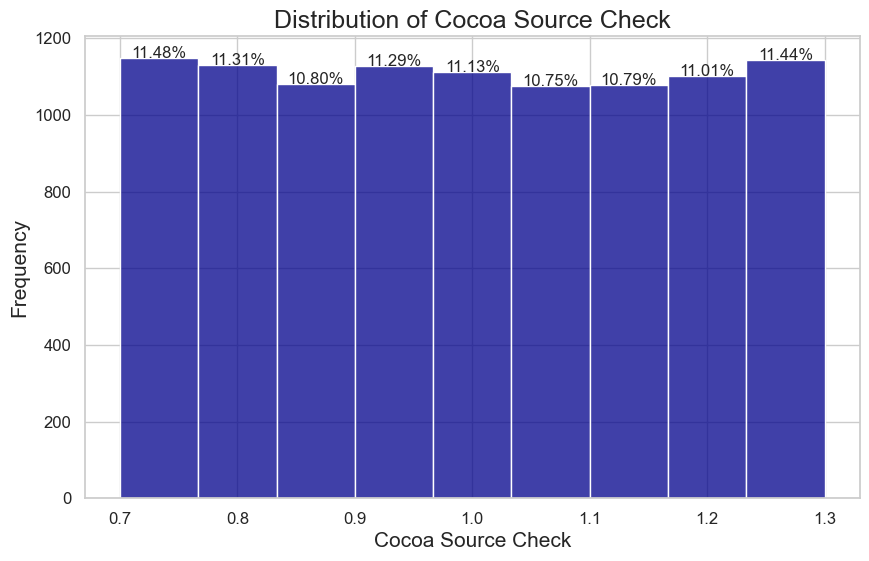

In [67]:
# Calculate min and max values for Cocoa_Source_Check
min_cocoa_source_check = prod_data['Cocoa_Source_Check'].min()
max_cocoa_source_check = prod_data['Cocoa_Source_Check'].max()

print(f"Min Value of Cocoa Source Check: {min_cocoa_source_check}")
print(f"Max Value of Cocoa Source Check: {max_cocoa_source_check}")

# Define bins and calculate histogram for Cocoa_Source_Check
bins = np.linspace(min_cocoa_source_check, max_cocoa_source_check, num=10)
hist, bin_edges = np.histogram(prod_data['Cocoa_Source_Check'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Cocoa Source Check
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Cocoa_Source_Check'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Cocoa Source Check', fontsize=18)
plt.xlabel('Cocoa Source Check', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 0.1, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Cocoa_Source_Check values range from 0.7 to 1.3, indicating a narrow and controlled range of scores used to evaluate the quality of cocoa sources.  The fairly uniform distribution across this range, with each bin containing approximately 10.75% to 11.48% of the observations, highlights the consistency in the quality of cocoa being sourced.

##### Flavor Infusion


In [70]:
prod_data['Flavor_Infusion'].describe()

count    9999.000000
mean        1.501989
std         0.286758
min         1.000280
25%         1.256135
50%         1.501103
75%         1.748772
max         1.999703
Name: Flavor_Infusion, dtype: float64

Min Value of Flavor Infusion: 1.000279616
Max Value of Flavor Infusion: 1.999703459


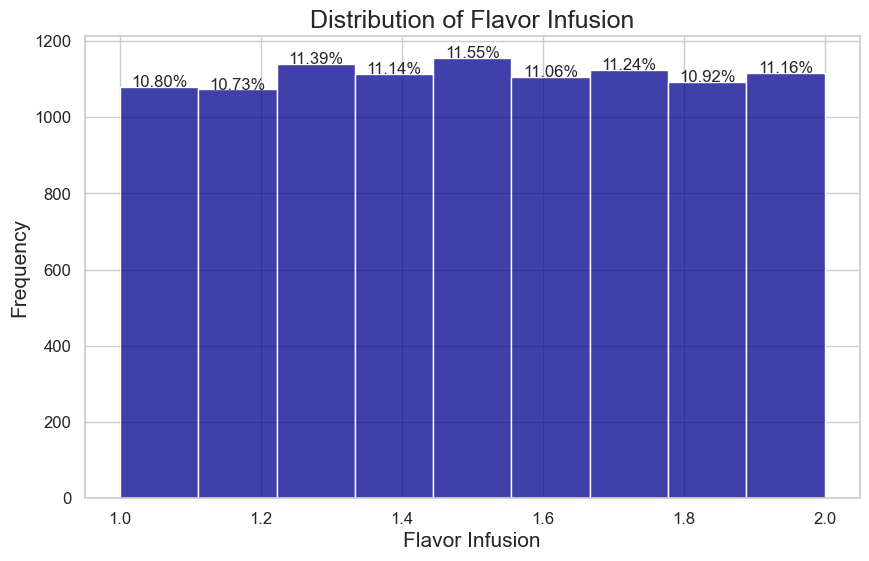

In [71]:
# Calculate min and max values for Flavor_Infusion
min_flavor_infusion = prod_data['Flavor_Infusion'].min()
max_flavor_infusion = prod_data['Flavor_Infusion'].max()

print(f"Min Value of Flavor Infusion: {min_flavor_infusion}")
print(f"Max Value of Flavor Infusion: {max_flavor_infusion}")

# Define bins and calculate histogram for Flavor_Infusion
bins = np.linspace(min_flavor_infusion, max_flavor_infusion, num=10)
hist, bin_edges = np.histogram(prod_data['Flavor_Infusion'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Flavor Infusion
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Flavor_Infusion'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Flavor Infusion', fontsize=18)
plt.xlabel('Flavor Infusion', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 0.1, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Flavor_Infusion values, ranging from 1.0 to 2.0 with a uniform distribution, indicate consistent flavor infusion processes across the chocolate products.

##### Shelf Life Test


In [74]:
prod_data['Shelf_Life_Test'].describe()

count    10000.000000
mean       164.954362
std          8.626869
min        150.009933
25%        157.415442
50%        164.995747
75%        172.345998
max        179.997359
Name: Shelf_Life_Test, dtype: float64

Min Value of Shelf Life Test: 150.0099329
Max Value of Shelf Life Test: 179.9973594


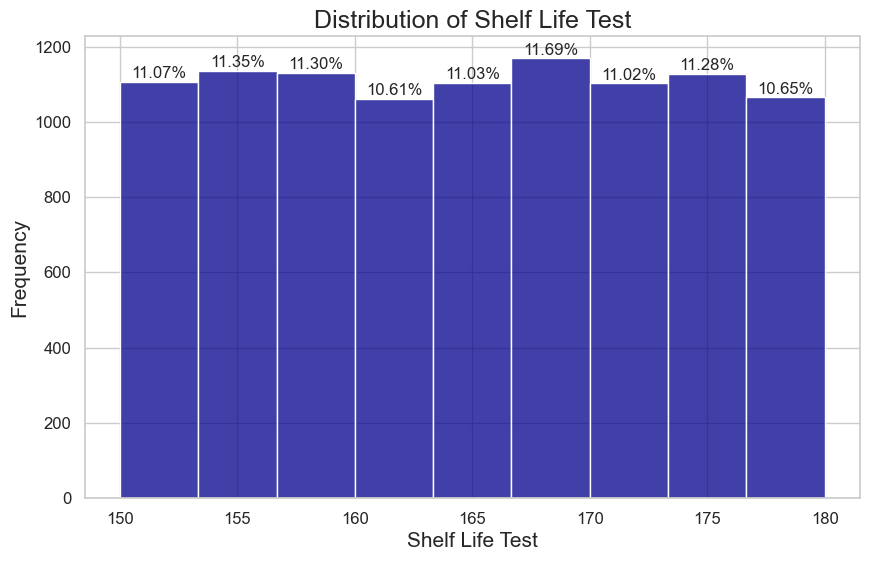

In [75]:
# Calculate min and max values for Shelf_Life_Test
min_shelf_life_test = prod_data['Shelf_Life_Test'].min()
max_shelf_life_test = prod_data['Shelf_Life_Test'].max()

print(f"Min Value of Shelf Life Test: {min_shelf_life_test}")
print(f"Max Value of Shelf Life Test: {max_shelf_life_test}")

# Define bins and calculate histogram for Shelf_Life_Test
bins = np.linspace(min_shelf_life_test, max_shelf_life_test, num=10)
hist, bin_edges = np.histogram(prod_data['Shelf_Life_Test'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Shelf Life Test
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Shelf_Life_Test'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Shelf Life Test', fontsize=18)
plt.xlabel('Shelf Life Test', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

##### Seal Integrity

In [77]:
prod_data['Seal_Integrity'].describe()

count    10000.000000
mean         0.850813
std          0.086636
min          0.700069
25%          0.775187
50%          0.851943
75%          0.924882
max          0.999975
Name: Seal_Integrity, dtype: float64

Min Value of Seal Integrity: 0.70006867
Max Value of Seal Integrity: 0.999975086


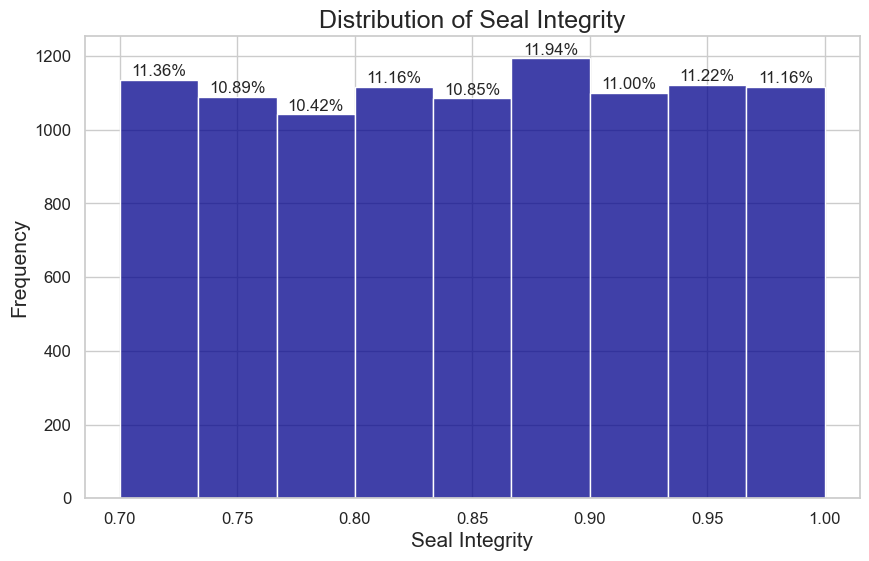

In [78]:
# Calculate min and max values for Seal_Integrity
min_seal_integrity = prod_data['Seal_Integrity'].min()
max_seal_integrity = prod_data['Seal_Integrity'].max()

print(f"Min Value of Seal Integrity: {min_seal_integrity}")
print(f"Max Value of Seal Integrity: {max_seal_integrity}")

# Define bins and calculate histogram for Seal_Integrity
bins = np.linspace(min_seal_integrity, max_seal_integrity, num=10)
hist, bin_edges = np.histogram(prod_data['Seal_Integrity'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Seal Integrity
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Seal_Integrity'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Seal Integrity', fontsize=18)
plt.xlabel('Seal Integrity', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

##### Barcode Scan Success

In [80]:
prod_data['Barcode_Scan_Success'].describe()

count    10000.000000
mean         0.979960
std          0.010010
min          0.940292
25%          0.973271
50%          0.980016
75%          0.986624
max          1.015199
Name: Barcode_Scan_Success, dtype: float64

Min Value of Barcode Scan Success: 0.940291854
Max Value of Barcode Scan Success: 1.015199262


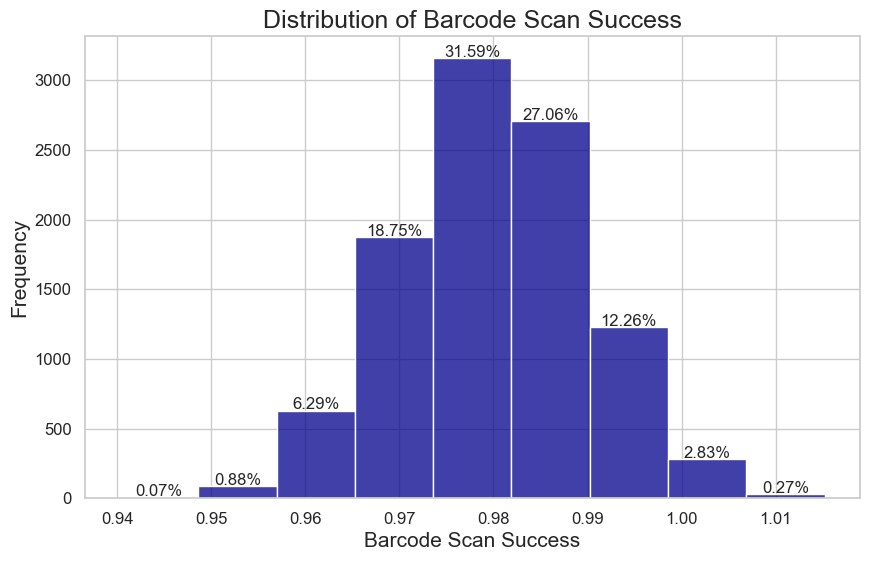

In [81]:
# Calculate min and max values for Barcode_Scan_Success
min_barcode_scan_success = prod_data['Barcode_Scan_Success'].min()
max_barcode_scan_success = prod_data['Barcode_Scan_Success'].max()

print(f"Min Value of Barcode Scan Success: {min_barcode_scan_success}")
print(f"Max Value of Barcode Scan Success: {max_barcode_scan_success}")

# Define bins and calculate histogram for Barcode_Scan_Success
bins = np.linspace(min_barcode_scan_success, max_barcode_scan_success, num=10)
hist, bin_edges = np.histogram(prod_data['Barcode_Scan_Success'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Barcode Scan Success
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Barcode_Scan_Success'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Barcode Scan Success', fontsize=18)
plt.xlabel('Barcode Scan Success', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Barcode_Scan_Success distribution ranges from approximately 0.94 to 1.01, indicating a high success rate in barcode scanning, with most values concentrated between 0.97 and 0.99. The peak frequency at 0.98 (31.59%) suggests that the majority of products have a near-perfect scan success rate, which is crucial for efficient inventory and tracking in the factory. A small percentage of products have slightly lower (around 0.94-0.96) or higher (around 1.00-1.01) success rates, which could indicate occasional issues with barcode quality or scanning equipment. Overall, the high success rates reflect well on the quality control measures in place for barcode scanning.

##### Box Dimensions

In [84]:
prod_data['Box_Dimensions'].describe()

count    9998.000000
mean        5.099827
std         0.057772
min         5.000049
25%         5.049758
50%         5.098989
75%         5.149305
max         5.199983
Name: Box_Dimensions, dtype: float64

Min Value of Box Dimensions: 5.000048623
Max Value of Box Dimensions: 5.199983453


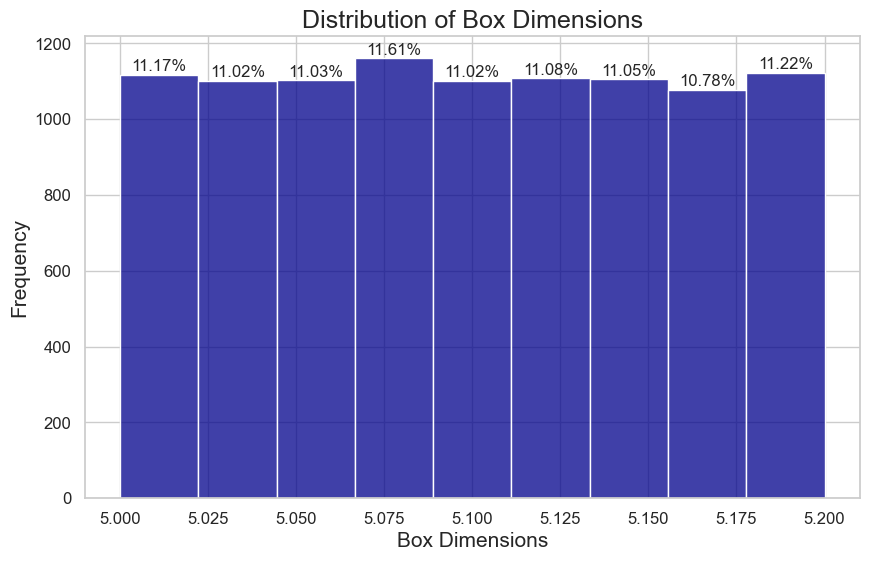

In [85]:
# Calculate min and max values for Box_Dimensions
min_box_dimensions = prod_data['Box_Dimensions'].min()
max_box_dimensions = prod_data['Box_Dimensions'].max()

print(f"Min Value of Box Dimensions: {min_box_dimensions}")
print(f"Max Value of Box Dimensions: {max_box_dimensions}")

# Define bins and calculate histogram for Box_Dimensions
bins = np.linspace(min_box_dimensions, max_box_dimensions, num=10)
hist, bin_edges = np.histogram(prod_data['Box_Dimensions'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Box Dimensions
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Box_Dimensions'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Box Dimensions', fontsize=18)
plt.xlabel('Box Dimensions', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Box_Dimensions distribution shows values ranging from approximately 5.00 to 5.20. The even distribution across this range suggests that there is no significant variation in box sizes, reflecting a strong adherence to quality control standards in packaging.

##### Label Readability

In [88]:
prod_data['Label_Readability'].describe()

count    10000.000000
mean        79.968821
std          1.497610
min         74.269995
25%         78.950887
50%         79.974011
75%         80.964107
max         85.752384
Name: Label_Readability, dtype: float64

Min Value of Label Readability: 74.26999501
Max Value of Label Readability: 85.75238383


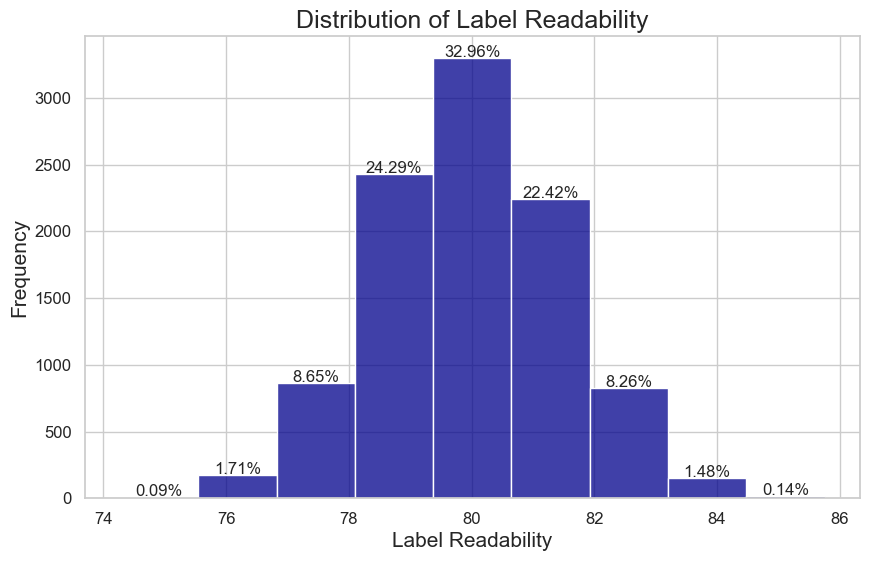

In [89]:
# Calculate min and max values for Label_Readability
min_label_readability = prod_data['Label_Readability'].min()
max_label_readability = prod_data['Label_Readability'].max()

print(f"Min Value of Label Readability: {min_label_readability}")
print(f"Max Value of Label Readability: {max_label_readability}")

# Define bins and calculate histogram for Label_Readability
bins = np.linspace(min_label_readability, max_label_readability, num=10)
hist, bin_edges = np.histogram(prod_data['Label_Readability'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Label Readability
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Label_Readability'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Label Readability', fontsize=18)
plt.xlabel('Label Readability', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Label_Readability distribution ranges from approximately 74 to 85, with a peak around 80, indicating that most products have a high level of label readability. The majority of the values fall within a narrow range, with 32.96% of the observations around 80. This suggests that the factory maintains a high standard for label readability, ensuring that consumers can easily read important information on the labels.

##### Nutritional Info Accuracy


In [92]:
prod_data['Nutritional_Info_Accuracy'].describe()

count    9999.000000
mean      902.424694
std       991.978618
min     -2848.043381
25%       231.220375
50%       895.431199
75%      1577.245289
max      4595.193693
Name: Nutritional_Info_Accuracy, dtype: float64

Min Value of Nutritional Info Accuracy: -2848.043381
Max Value of Nutritional Info Accuracy: 4595.193693


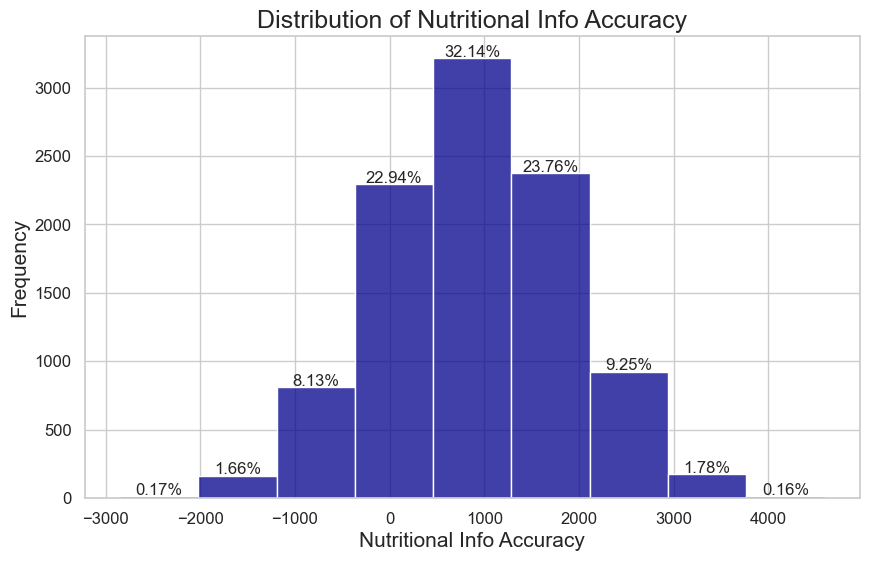

In [93]:
# Calculate min and max values for Nutritional_Info_Accuracy
min_nutritional_info_accuracy = prod_data['Nutritional_Info_Accuracy'].min()
max_nutritional_info_accuracy = prod_data['Nutritional_Info_Accuracy'].max()

print(f"Min Value of Nutritional Info Accuracy: {min_nutritional_info_accuracy}")
print(f"Max Value of Nutritional Info Accuracy: {max_nutritional_info_accuracy}")

# Define bins and calculate histogram for Nutritional_Info_Accuracy
bins = np.linspace(min_nutritional_info_accuracy, max_nutritional_info_accuracy, num=10)
hist, bin_edges = np.histogram(prod_data['Nutritional_Info_Accuracy'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Nutritional Info Accuracy
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Nutritional_Info_Accuracy'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Nutritional Info Accuracy', fontsize=18)
plt.xlabel('Nutritional Info Accuracy', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

The Nutritional_Info_Accuracy distribution shows a range from approximately -2848 to 4595, with a peak around 0. The majority of the observations cluster around 0, indicating that the nutritional information provided on the labels is generally accurate. Values close to 0 suggest minimal deviation from the expected nutritional values, which is critical for maintaining consumer trust and complying with regulatory standards.

The presence of negative values, albeit in smaller percentages, suggests that there are some instances where the reported nutritional information is less than the actual values. Conversely, positive values indicate instances where the reported nutritional information exceeds the actual values. The small percentages at the extreme ends indicate these discrepancies are relatively rare, reflecting the factory's overall accuracy in reporting nutritional information.

This distribution implies that while there are occasional inaccuracies, the factory generally maintains high standards in reporting nutritional information.

##### Chocolate Glossiness


In [96]:
prod_data['Chocolate_Glossiness'].describe()

count    10000.000000
mean         0.860546
std          0.034693
min          0.800001
25%          0.830343
50%          0.860982
75%          0.890722
max          0.919995
Name: Chocolate_Glossiness, dtype: float64

Min Value of Chocolate Glossiness: 0.80000131
Max Value of Chocolate Glossiness: 0.919995317


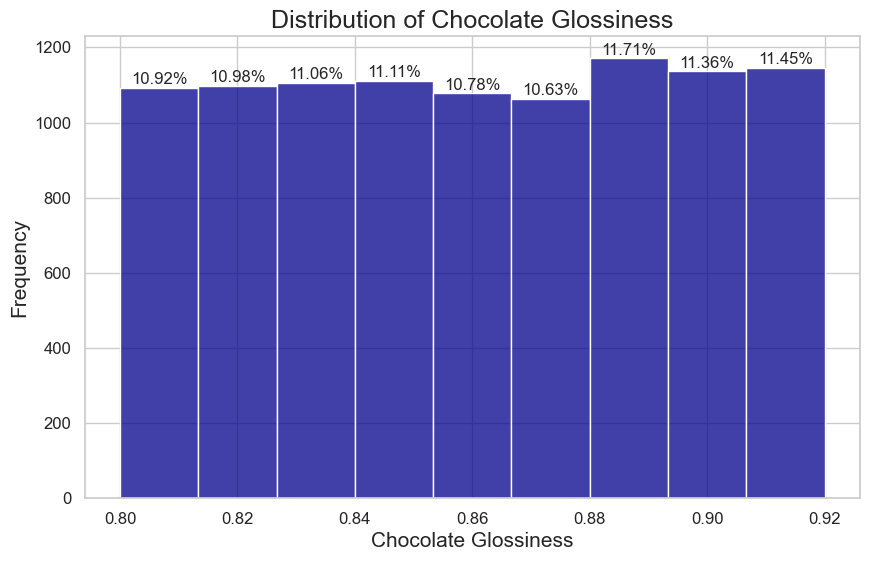

In [97]:
# Calculate min and max values for Chocolate_Glossiness
min_chocolate_glossiness = prod_data['Chocolate_Glossiness'].min()
max_chocolate_glossiness = prod_data['Chocolate_Glossiness'].max()

print(f"Min Value of Chocolate Glossiness: {min_chocolate_glossiness}")
print(f"Max Value of Chocolate Glossiness: {max_chocolate_glossiness}")

# Define bins and calculate histogram for Chocolate_Glossiness
bins = np.linspace(min_chocolate_glossiness, max_chocolate_glossiness, num=10)
hist, bin_edges = np.histogram(prod_data['Chocolate_Glossiness'], bins=bins)
percentages = (hist / hist.sum()) * 100

# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Chocolate Glossiness
plt.figure(figsize=(10, 6))
sns.histplot(prod_data['Chocolate_Glossiness'], bins=bins, color='darkblue', kde=False)
plt.title('Distribution of Chocolate Glossiness', fontsize=18)
plt.xlabel('Chocolate Glossiness', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i in range(len(hist)):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i])/2, hist[i] + 10, f'{percentages[i]:.2f}%', ha='center', fontsize=12)

plt.show()

This consistency suggests that the factory maintains a uniform standard of glossiness in its chocolate production. Such uniformity is desirable as it reflects a controlled and standardized manufacturing process, ensuring that each piece of chocolate has a similar appearance.

##### Status


In [100]:
prod_data['Status'].describe()

count     10000
unique        2
top        Okay
freq       9198
Name: Status, dtype: object

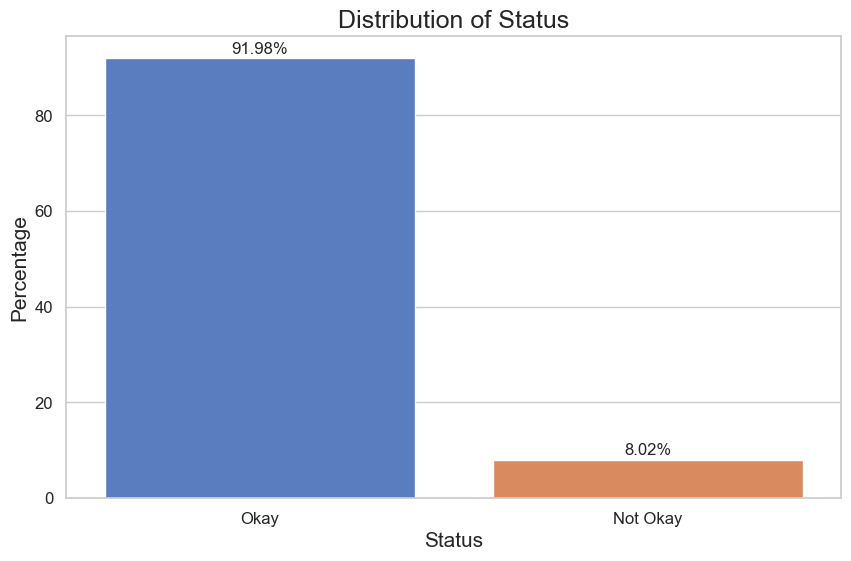

In [101]:
# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Status
plt.figure(figsize=(10, 6))
status_counts = prod_data['Status'].value_counts(normalize=True) * 100
sns.barplot(x=status_counts.index, y=status_counts.values, palette='muted')
plt.title('Distribution of Status', fontsize=18)
plt.xlabel('Status', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i, percentage in enumerate(status_counts.values):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.show()

The Status distribution shows that 91.98% of the chocolate production records are labeled as "Okay," indicating that the vast majority of the production meets the quality standards. Meanwhile, 8.02% of the records are labeled as "Not Okay," meaning that a small but significant portion of the production fails to meet the quality criteria.

#### b) Date Validity

Ensure that dates are in a valid format and make logical sense (e.g., no future dates for past production records).

In [105]:
# Check for missing values
missing_dates = prod_data['Date'].isnull().sum()
print(f"Number of missing dates: {missing_dates}")

# Ensure all dates are in the correct format (assuming the date column is already converted to datetime)
invalid_dates_format = prod_data[~pd.to_datetime(prod_data['Date'], errors='coerce').notnull()]
print(f"Number of invalid date formats: {len(invalid_dates_format)}")

# Check for future dates
current_date = pd.Timestamp.now()
future_dates = prod_data[prod_data['Date'] > current_date]
print(f"Number of future dates: {len(future_dates)}")

# Check for duplicates
duplicate_dates = prod_data['Date'].duplicated().sum()
print(f"Number of duplicate dates: {duplicate_dates}")

# Check date range
min_date = prod_data['Date'].min()
max_date = prod_data['Date'].max()
print(f"Date range: {min_date} to {max_date}")

# Check for chronological order
if not prod_data['Date'].is_monotonic_increasing:
    print("Dates are not in chronological order.")
else:
    print("Dates are in chronological order.")

# Convert the 'Date' column to datetime if not already done
prod_data['Date'] = pd.to_datetime(prod_data['Date'], errors='coerce')

# Display the dataset with any invalid dates
invalid_dates = prod_data[prod_data['Date'].isnull()]
if not invalid_dates.empty:
    print("Invalid dates found:")
    print(invalid_dates)
else:
    print("All dates are valid.")

Number of missing dates: 0
Number of invalid date formats: 0
Number of future dates: 0
Number of duplicate dates: 9993
Date range: 2023-01-08 00:00:00 to 2023-07-08 00:00:00
Dates are not in chronological order.
All dates are valid.


The dataset's date feature has been thoroughly validated and shows the following results: There are no missing date values, all dates are correctly formatted, and no dates extend into the future. A significant number of dates are duplicated, indicating that many records share the same date. This suggests that the data collection process captures observations on a monthly basis, which aligns with the dataset covering a six-month period from January 8, 2023, to July 8, 2023. The dates are not in chronological order, but since the data points represent monthly intervals, this does not affect the overall analysis. All dates are valid and provide a comprehensive view of operations within the specified timeframe.

         Date  Date_Month
0  2023-07-08           7
1  2023-04-08           4
2  2023-05-08           5
4  2023-03-08           3
8  2023-02-08           2
16 2023-06-08           6
25 2023-01-08           1


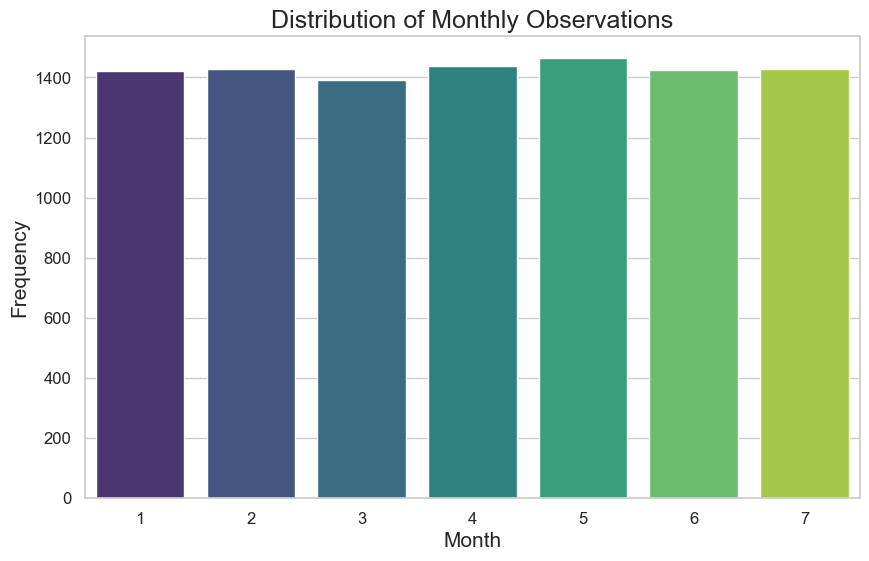

In [107]:
# Map each unique date to a sequential number
date_mapping = {date: idx+1 for idx, date in enumerate(sorted(prod_data['Date'].unique()))}
prod_data['Date_Month'] = prod_data['Date'].map(date_mapping)

# Display the updated DataFrame
print(prod_data[['Date', 'Date_Month']].drop_duplicates())

# Plot the distribution of the sequential dates
plt.figure(figsize=(10, 6))
sns.countplot(data=prod_data, x='Date_Month', palette="viridis")
plt.title('Distribution of Monthly Observations', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The dates in the dataset have been simplified by mapping each month to a sequential number. January 2023 is represented by 1, February by 2, March by 3, April by 4, May by 5, June by 6, and July by 7. This transformation allows for easier visualization and analysis of the data while maintaining the monthly sequence. The bar chart illustrates the distribution of observations across these seven months.

In [109]:
metric_features

['Cocoa_Roasting_Level',
 'Sugar_Granularity',
 'Milk_Solid_Percentage',
 'Nuts_Inclusion_Rate',
 'Texture_Smoothness',
 'Sweetness_Level',
 'Cocoa_Source_Check',
 'Flavor_Infusion',
 'Shelf_Life_Test',
 'Seal_Integrity',
 'Barcode_Scan_Success',
 'Box_Dimensions',
 'Label_Readability',
 'Nutritional_Info_Accuracy',
 'Chocolate_Glossiness']

#### d) Unique Identifiers

Check that Record_ID is unique and does not have duplicates.

In [112]:
# Check for uniqueness in the 'Record_ID' column
unique_record_ids = prod_data['Record_ID'].is_unique

if unique_record_ids:
    print("All Record_ID values are unique. No duplicates found.")
else:
    print("There are duplicate Record_ID values.")
    # Display duplicate Record_ID values
    duplicates = prod_data[prod_data['Record_ID'].duplicated(keep=False)]
    print(duplicates)

All Record_ID values are unique. No duplicates found.


#### Determine correlations between different stations

In [114]:
# Filter the data for "Okay" and "Not Okay" instances
okay_data = prod_data[prod_data['Status'] == 'Okay']
not_okay_data = prod_data[prod_data['Status'] == 'Not Okay']

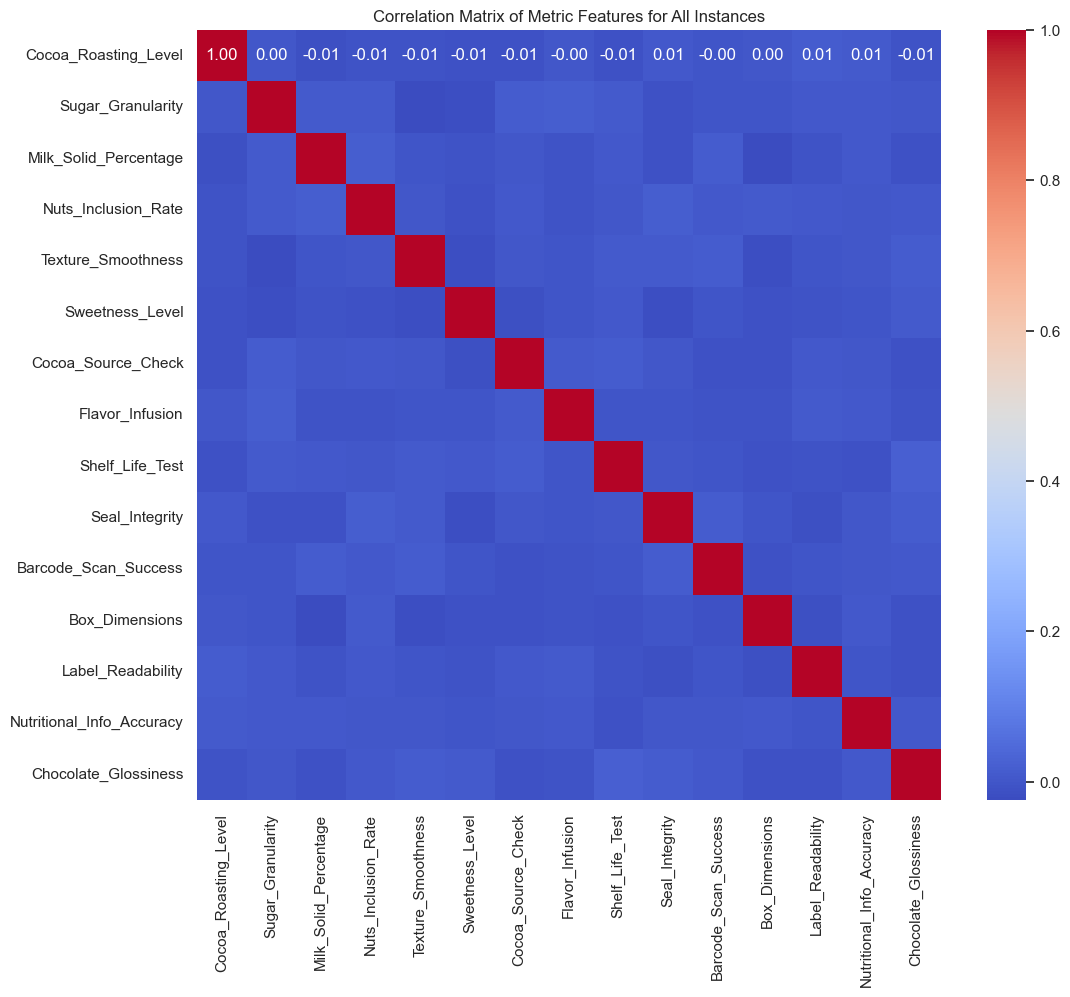

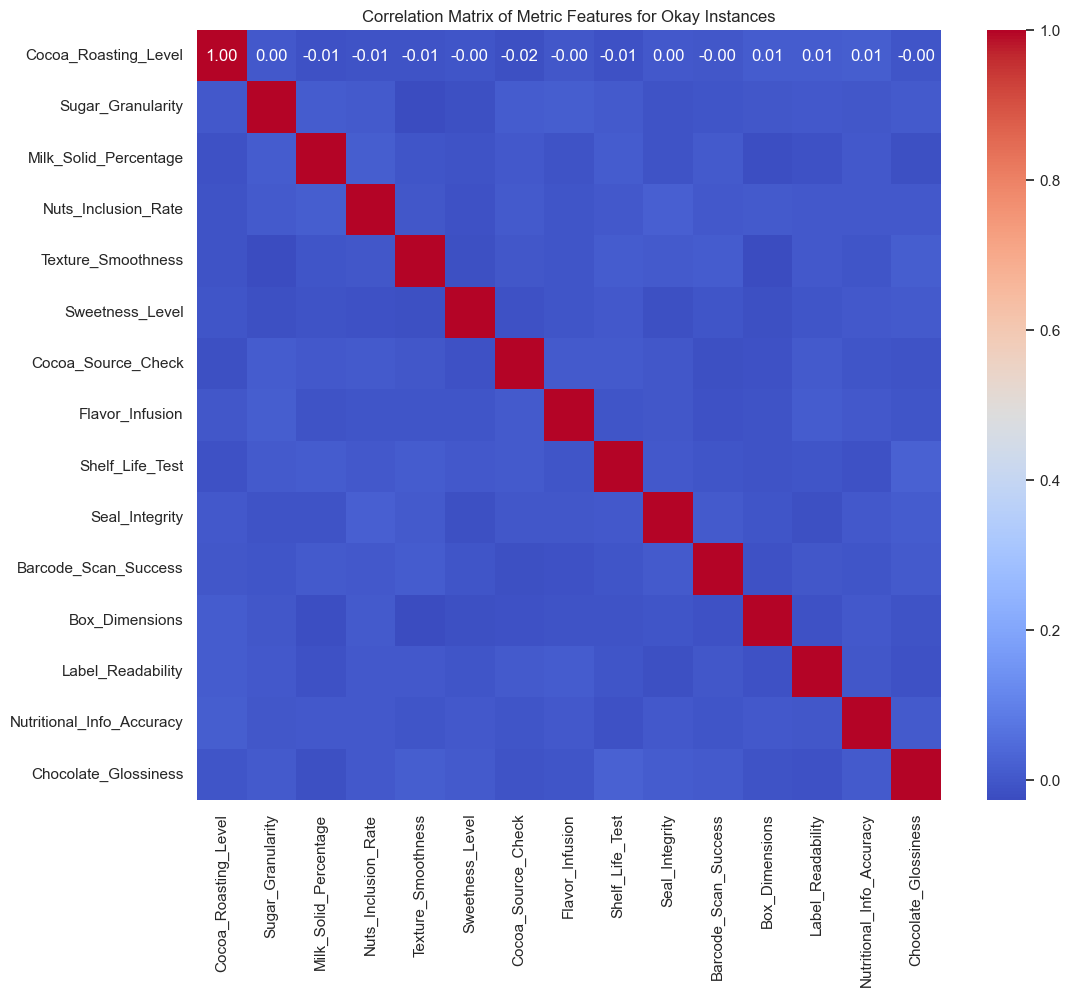

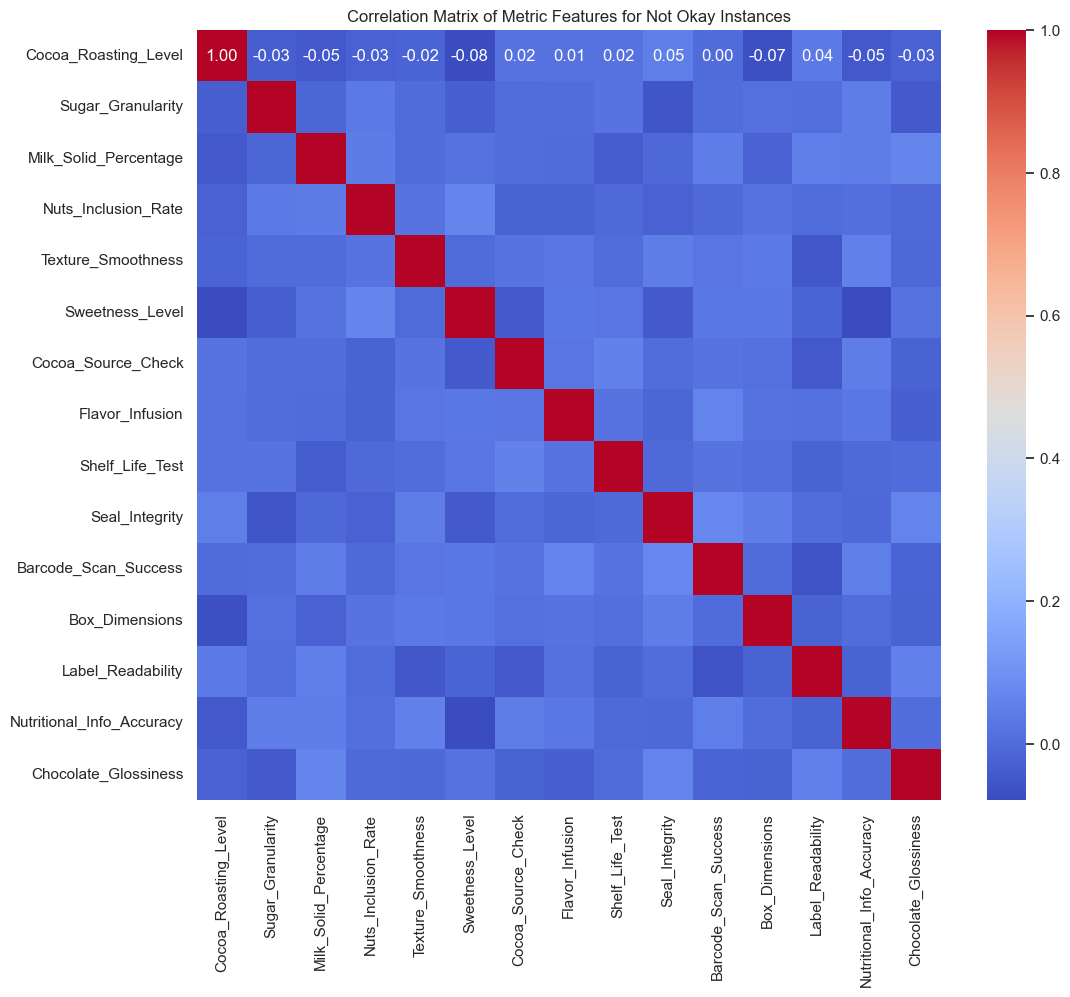

In [115]:
corr_matrix_all = prod_data[metric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Metric Features for All Instances')
plt.show()

# Compute the correlation matrix for "okay" instances 
corr_matrix_okay = okay_data[metric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_okay, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Metric Features for Okay Instances')
plt.show()

# Compute the correlation matrix for "not okay" instances 
corr_matrix_not_okay = not_okay_data[metric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_not_okay, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Metric Features for Not Okay Instances')
plt.show()

Features are not correlated.

#### Identify patterns in "not okay" instances

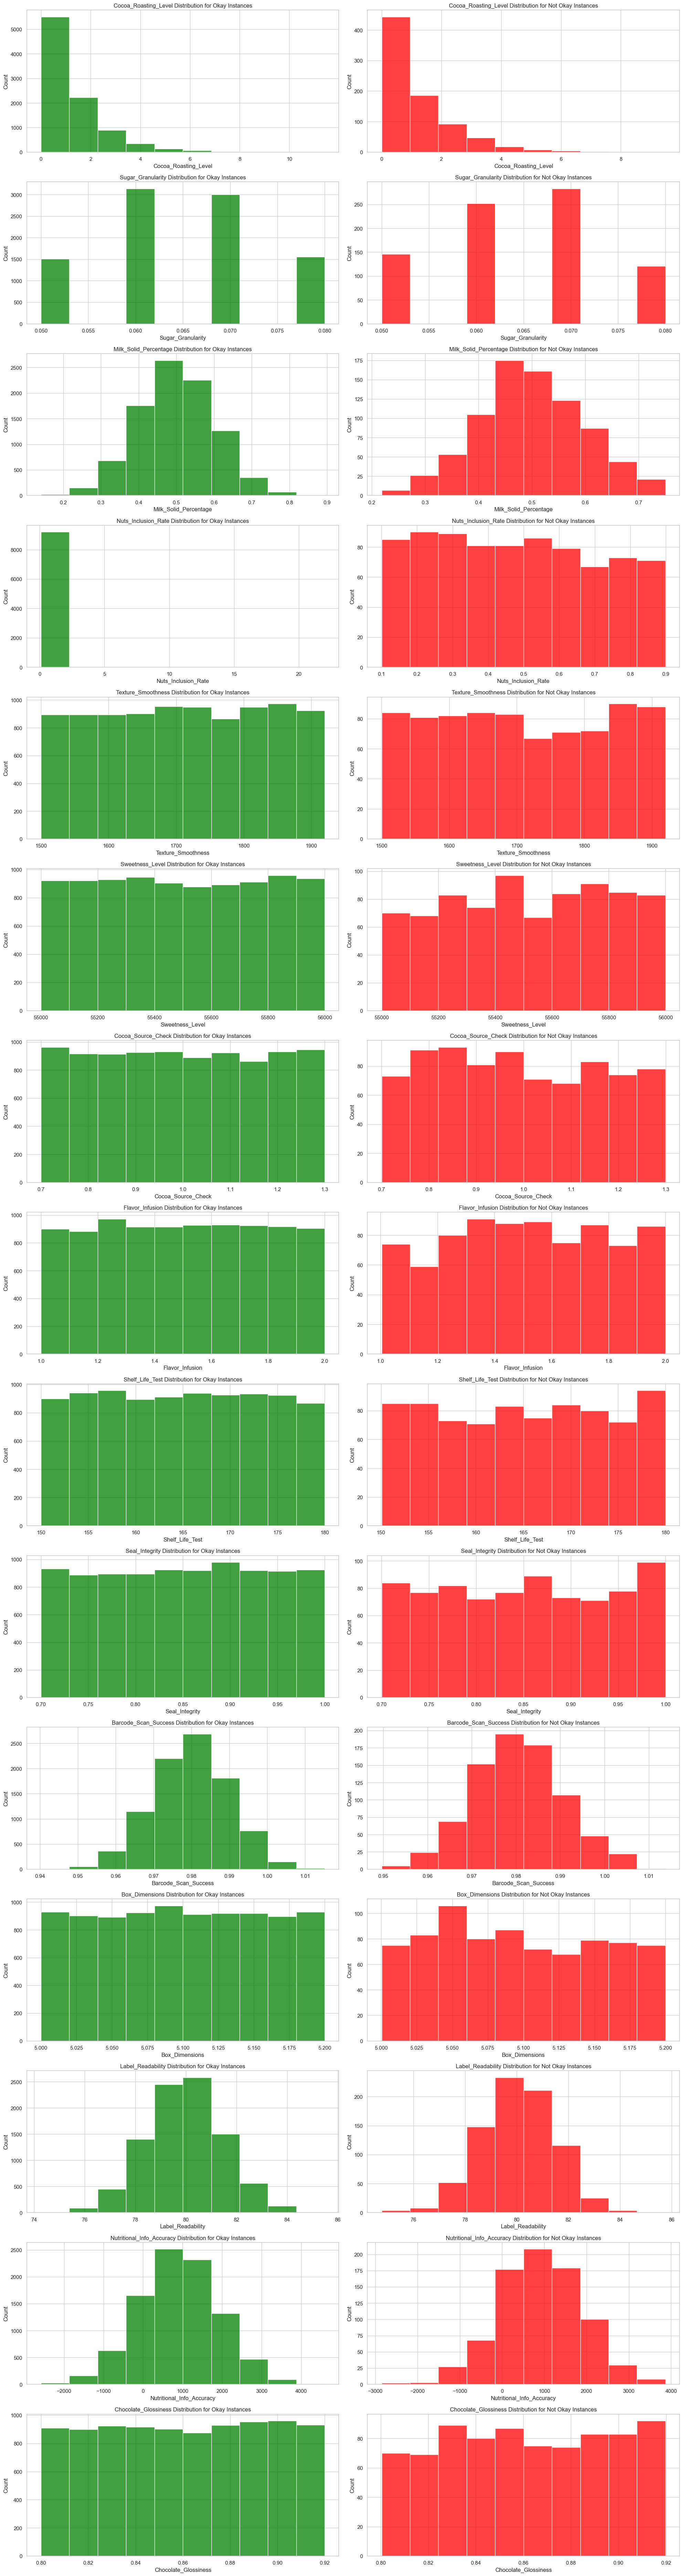

In [118]:
fig, axes = plt.subplots(nrows=len(metric_features), ncols=2, figsize=(20, 5*len(metric_features)))

# Plot each metric feature
for i, feature in enumerate(metric_features):
    sns.histplot(okay_data[feature], bins=10, color='green', kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} Distribution for Okay Instances')
    
    sns.histplot(not_okay_data[feature], bins=10, color='red', kde=False, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Distribution for Not Okay Instances')

plt.tight_layout()
plt.show()

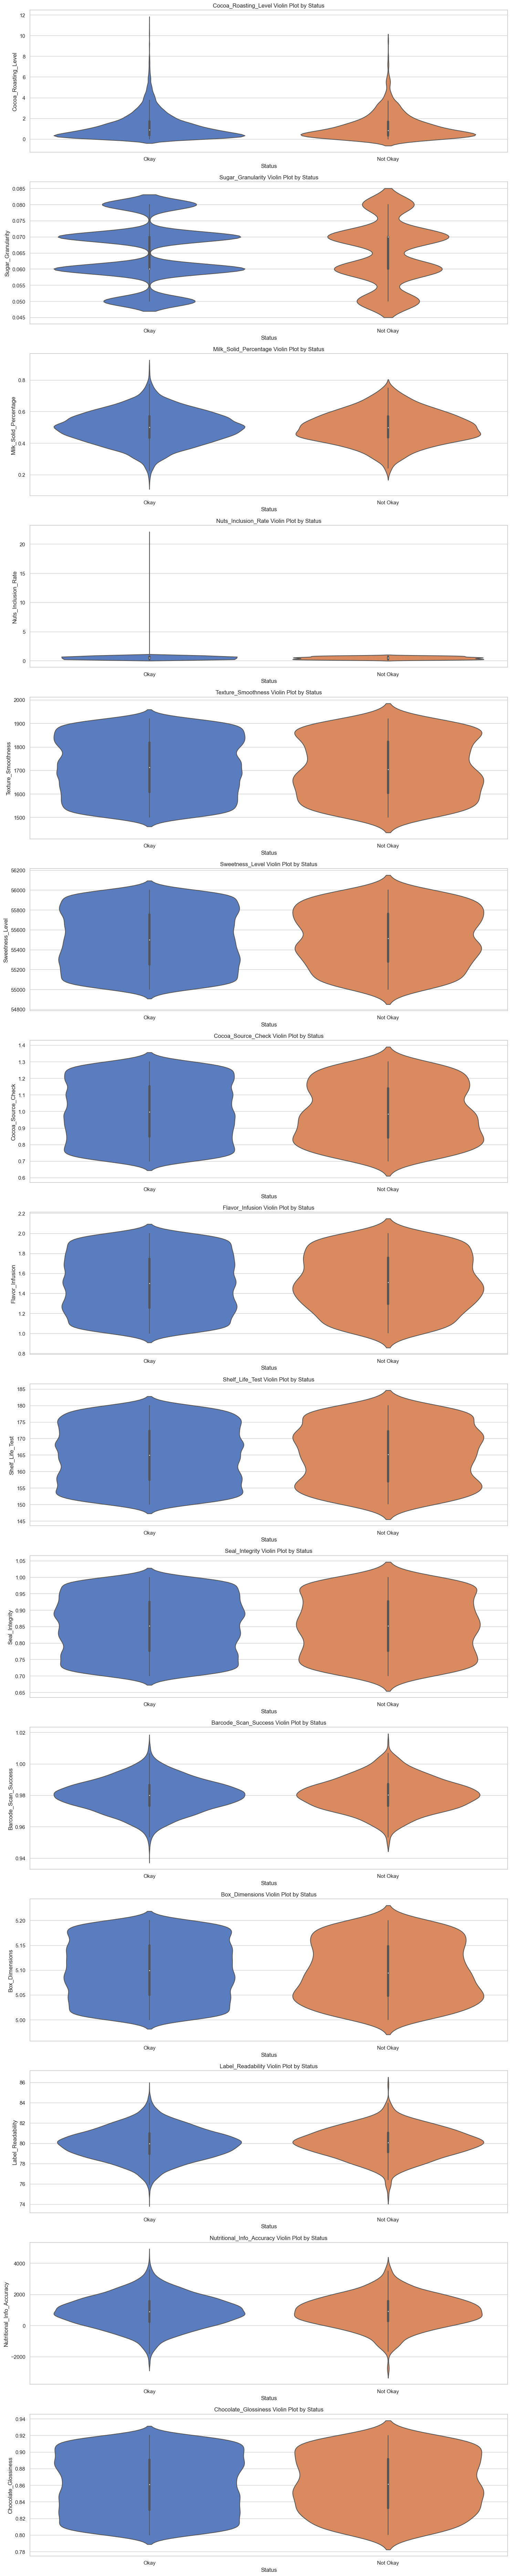

In [119]:
fig, axes = plt.subplots(nrows=len(metric_features), ncols=1, figsize=(15, 5*len(metric_features)))

# Plot each metric feature
for i, feature in enumerate(metric_features):
    sns.violinplot(x='Status', y=feature, data=prod_data, ax=axes[i])
    axes[i].set_title(f'{feature} Violin Plot by Status')

plt.tight_layout()
plt.show()

Looks like the features are not correlated at all, so we will not remove any of them.

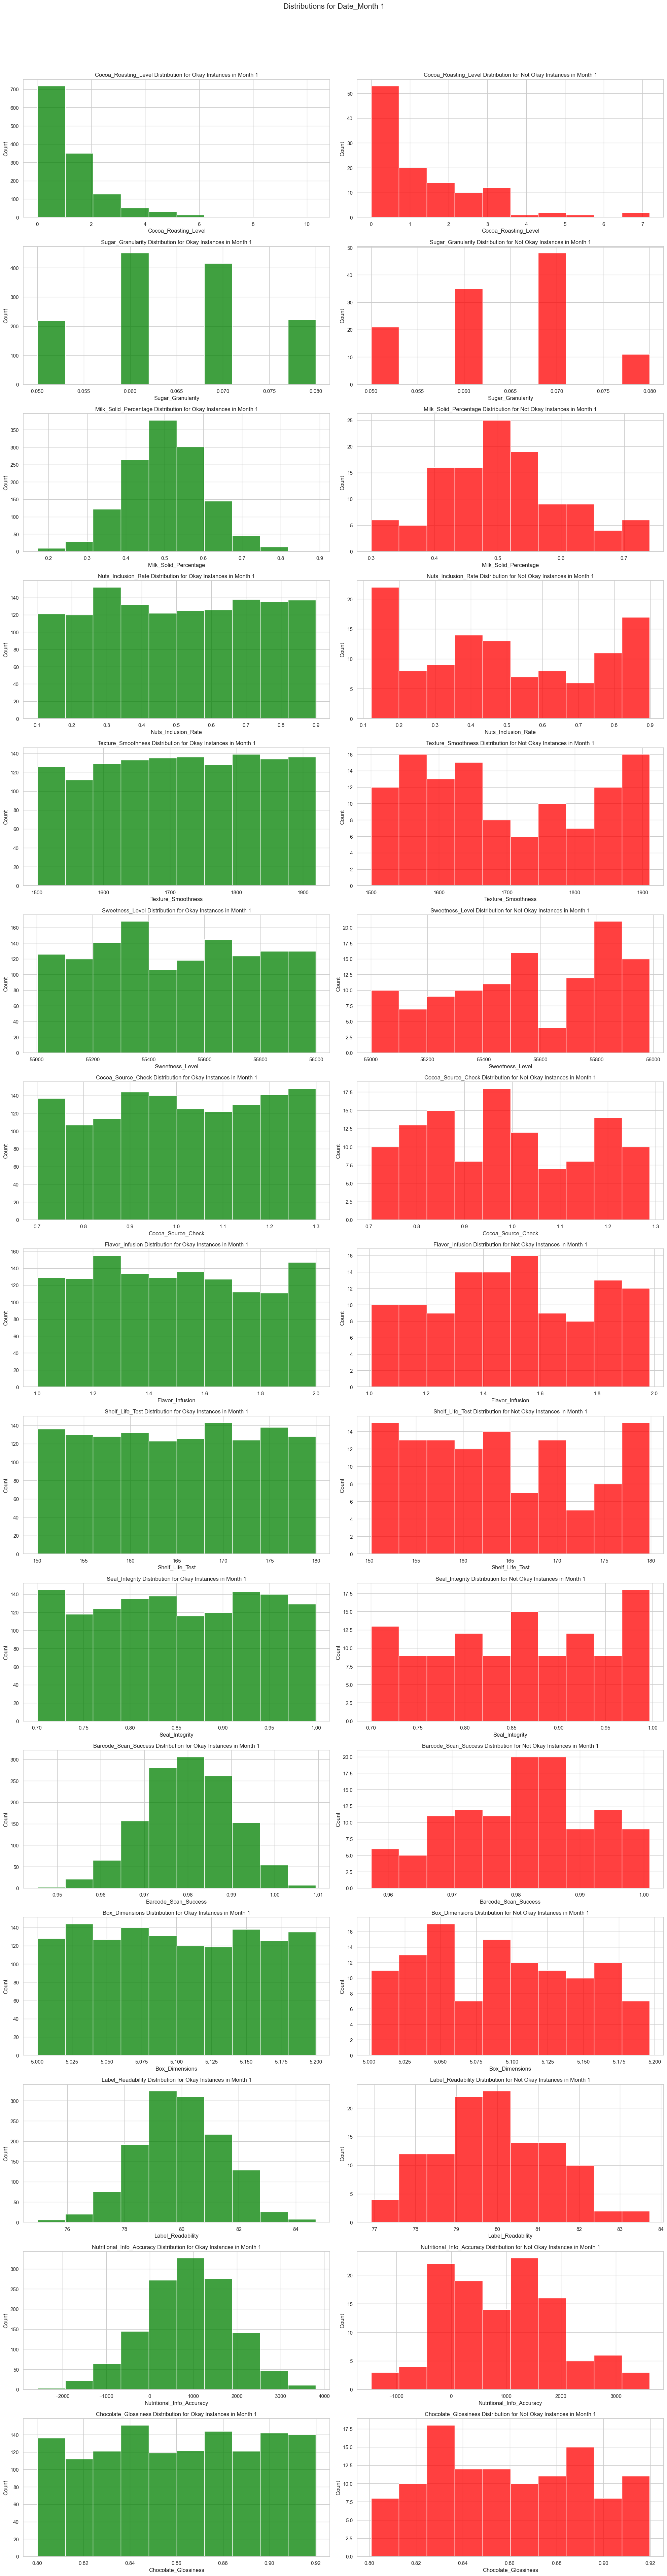

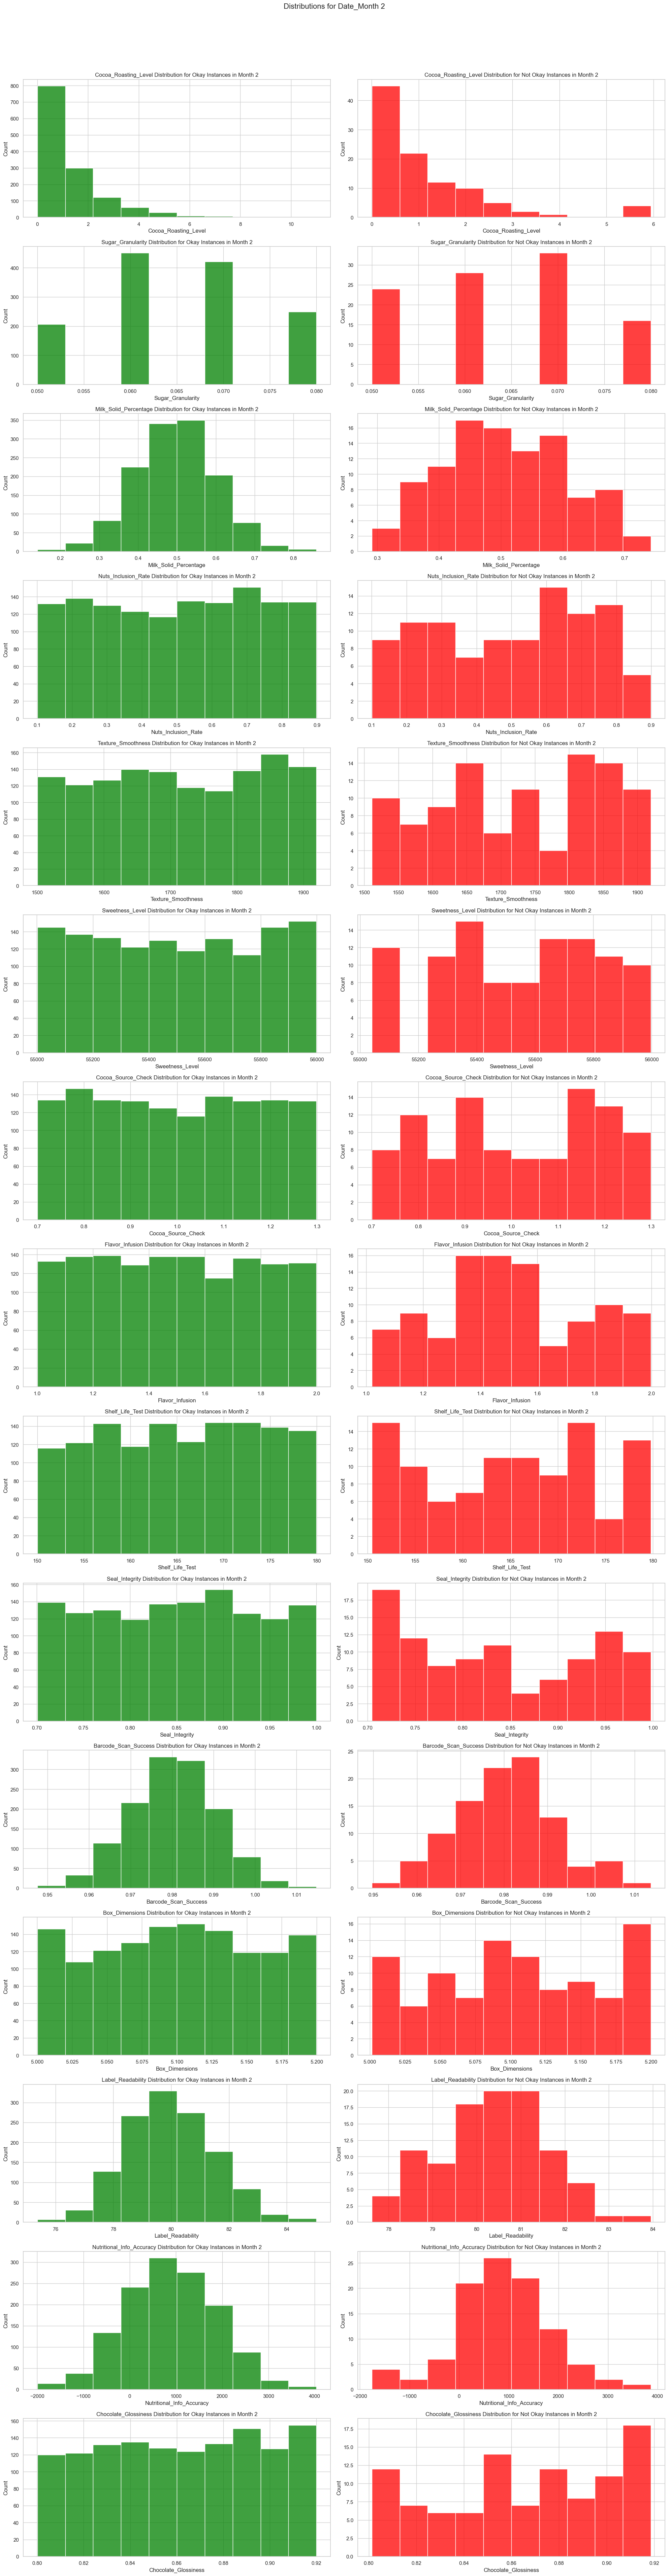

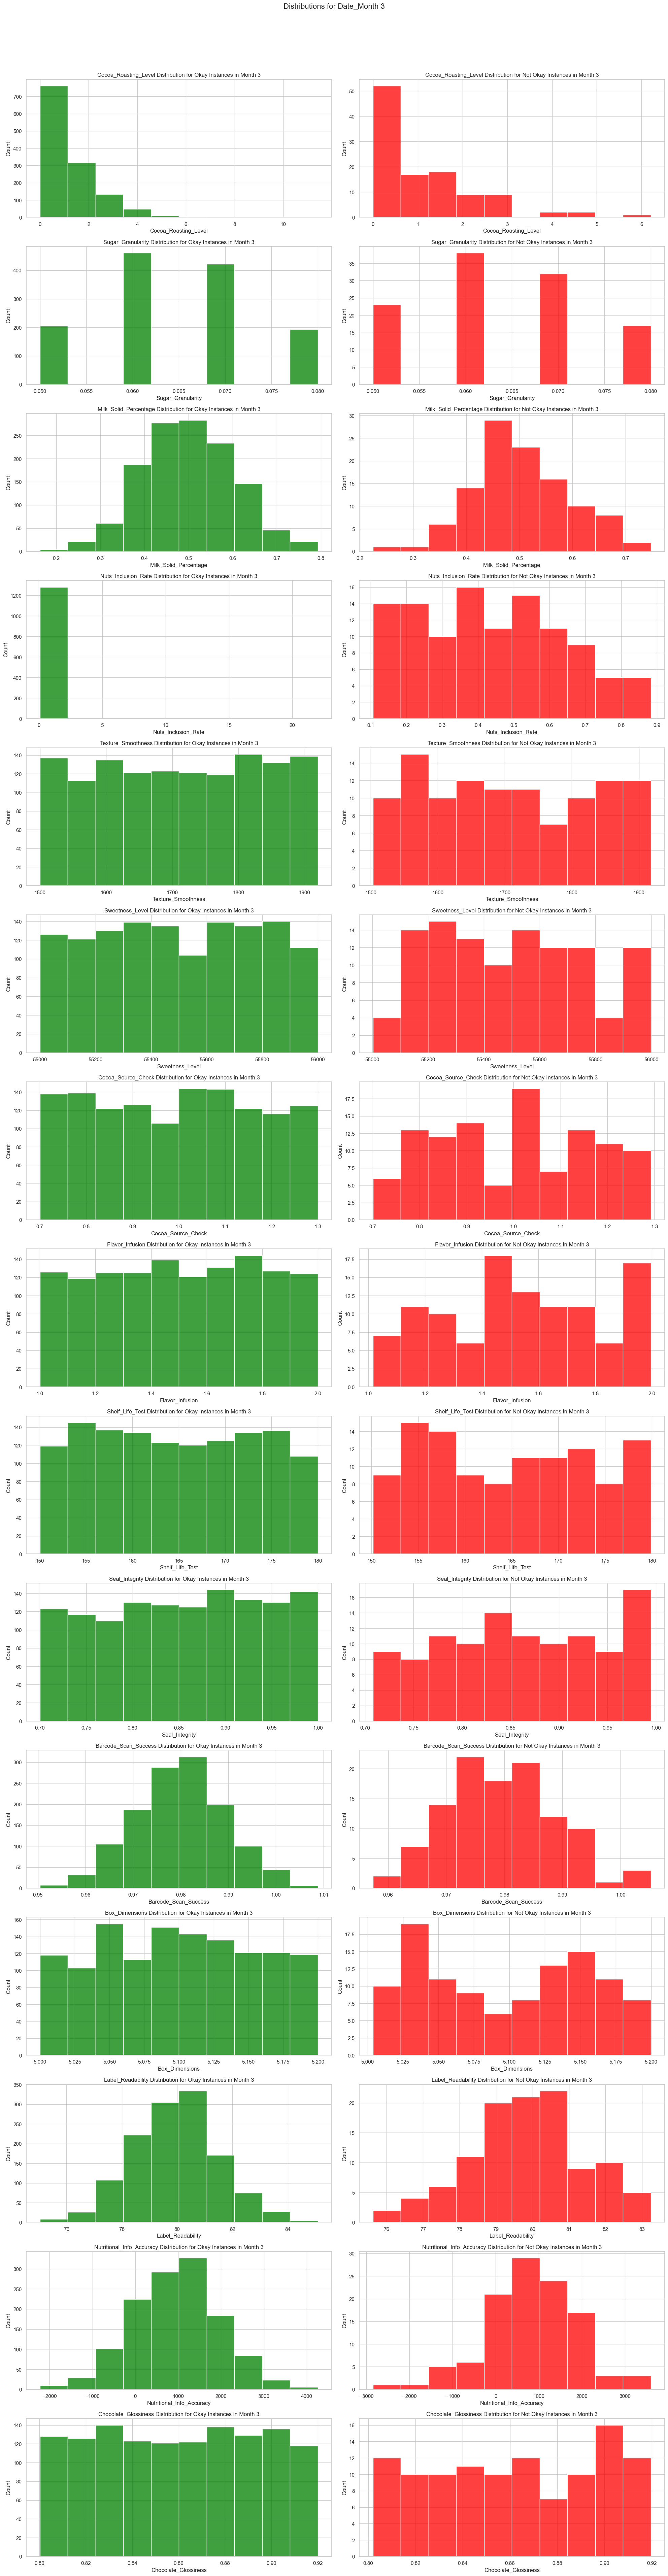

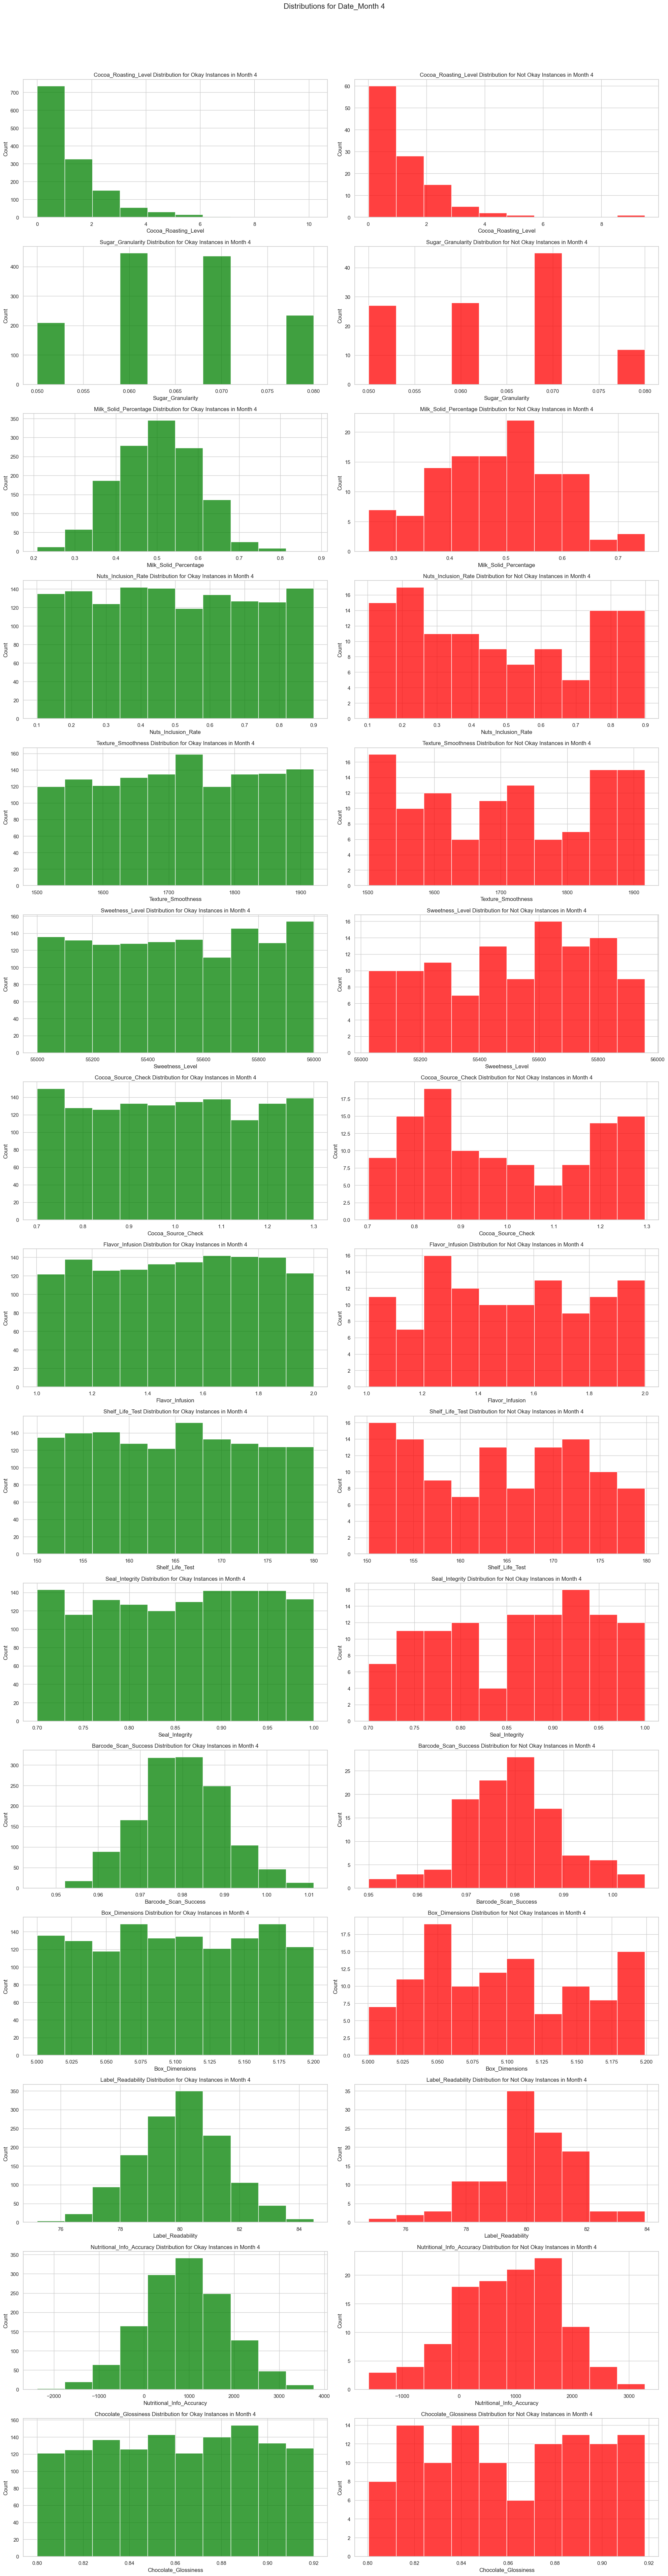

KeyboardInterrupt: 

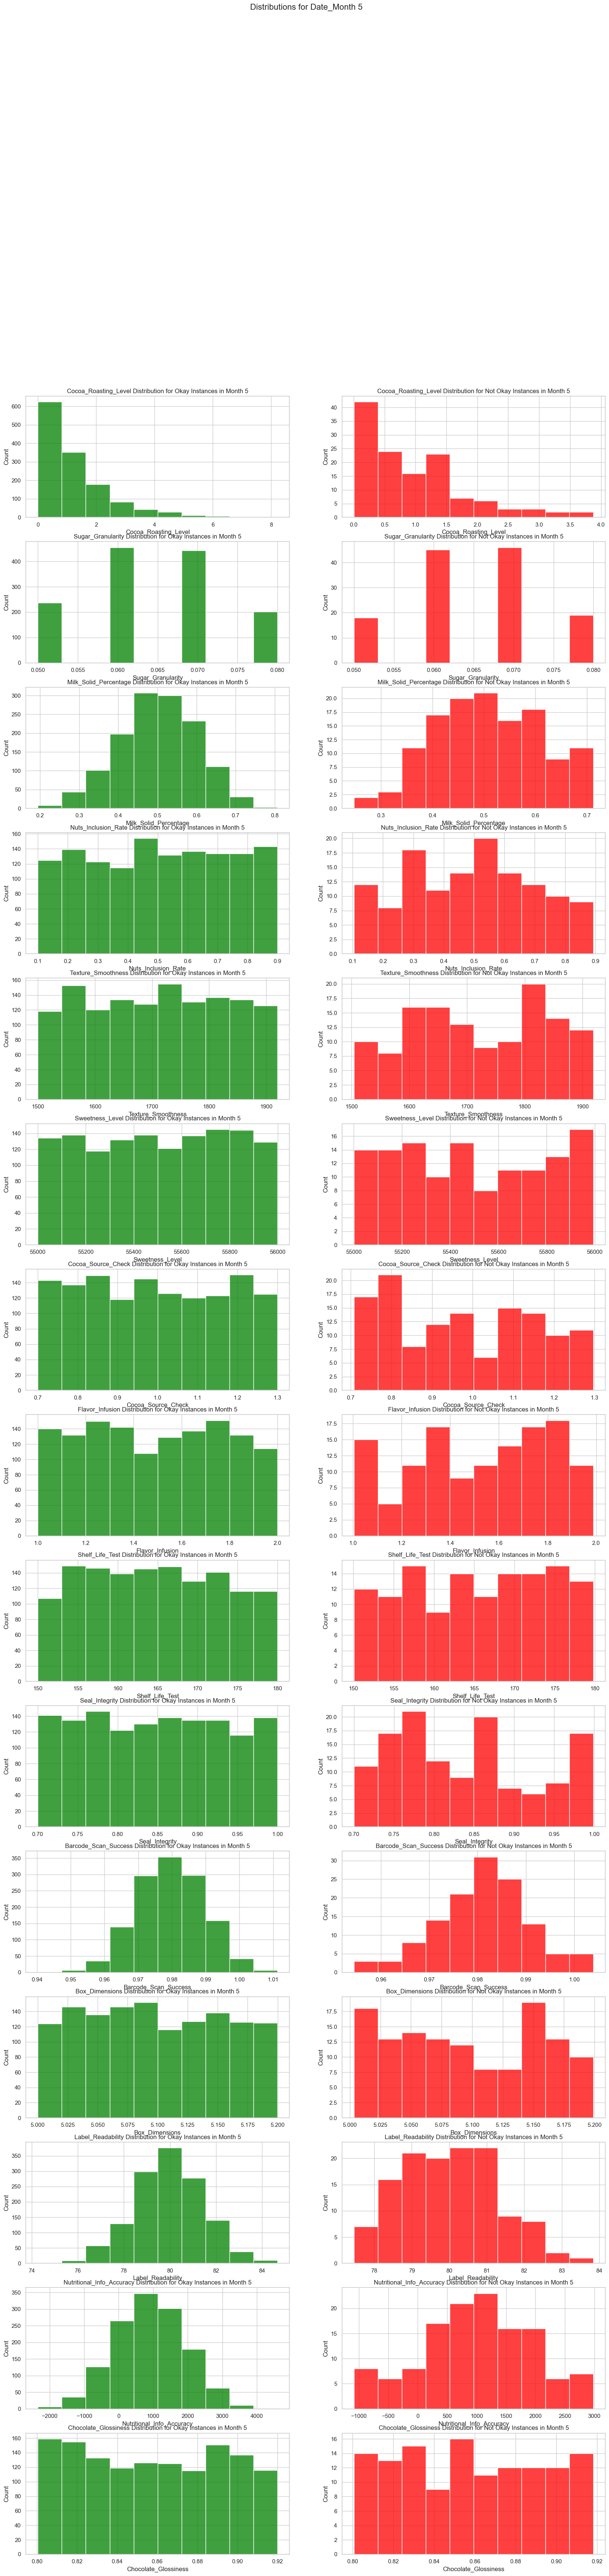

In [121]:
# Assuming that you have the `Date_Month` column in your dataframes
months = sorted(okay_data['Date_Month'].unique())

for month in months:
    # Filter data for the current month
    okay_month_data = okay_data[okay_data['Date_Month'] == month]
    not_okay_month_data = not_okay_data[not_okay_data['Date_Month'] == month]
    
    fig, axes = plt.subplots(nrows=len(metric_features), ncols=2, figsize=(20, 5*len(metric_features)))
    fig.suptitle(f'Distributions for Date_Month {month}', fontsize=16, y=1.02)

    # Plot each metric feature
    for i, feature in enumerate(metric_features):
        sns.histplot(okay_month_data[feature], bins=10, color='green', kde=False, ax=axes[i, 0])
        axes[i, 0].set_title(f'{feature} Distribution for Okay Instances in Month {month}')
        
        sns.histplot(not_okay_month_data[feature], bins=10, color='red', kde=False, ax=axes[i, 1])
        axes[i, 1].set_title(f'{feature} Distribution for Not Okay Instances in Month {month}')

    plt.tight_layout()
    plt.show()

In [ ]:
#months = sorted(okay_data['Date_Month'].unique())

#for feature in metric_features:
#    fig, axes = plt.subplots(nrows=1, ncols=len(months), figsize=(25, 5), sharey=True)
#    fig.suptitle(f'{feature} Distribution Across Months', fontsize=16)

#    for i, month in enumerate(months):
        # Filter data for the current month
#        okay_month_data = okay_data[okay_data['Date_Month'] == month]
#        not_okay_month_data = not_okay_data[not_okay_data['Date_Month'] == month]

#        sns.histplot(okay_month_data[feature], bins=10, color='green', kde=False, ax=axes[i], label='Okay', alpha=0.5)
#        sns.histplot(not_okay_month_data[feature], bins=10, color='red', kde=False, ax=axes[i], label='Not Okay', alpha=0.5)
#        axes[i].set_title(f'Month {month}')
#        axes[i].set_xlabel(feature)
#        axes[i].legend()

#    plt.tight_layout()
#    plt.show()

Upon analyzing the distribution of features across different months, consistent patterns were observed for both "Okay" and "Not Okay" statuses in all features except for the Nuts Inclusion Rate. In Month 3, the plot is not accurate because we have the presence of one outlier. We will make the plot without the outlier to visualize if the patern is similar to the other months.

In [ ]:
# Filter the data for Month 3 and remove the outlier
month3_data = prod_data[(prod_data['Date_Month'] == 3) & (prod_data['Nuts_Inclusion_Rate'] <= 1)]

# Create the plot
plt.figure(figsize=(6, 4))
sns.histplot(month3_data[month3_data['Status'] == 'Okay']['Nuts_Inclusion_Rate'], bins=10, color='green', kde=False, label='Okay')
sns.histplot(month3_data[month3_data['Status'] == 'Not Okay']['Nuts_Inclusion_Rate'], bins=10, color='red', kde=False, label='Not Okay')
plt.xlim(0, 1)
plt.title('Nuts_Inclusion_Rate Distribution for Month 3')
plt.xlabel('Nuts_Inclusion_Rate')
plt.ylabel('Count')
plt.legend()
plt.show()

The line plot illustrates the trend of Nuts Inclusion Rate over seven months for both "Okay" and "Not Okay" products. Notably, in Month 3, the Nuts Inclusion Rate for "Not Okay" products significantly decreases, while it increases for "Okay" products. This indicates a potential production issue or a change in quality control processes during that month, where the products classified as "Not Okay" had a lower inclusion rate of nuts, whereas the "Okay" products received a higher rate. This divergence suggests that Month 3 experienced inconsistent handling or quality control in the production process.

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=prod_data, x='Date_Month', hue='Status')
plt.title('Monthly Counts of Okay and Not Okay Instances')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

The bar chart shows that the count of "Okay" instances is consistently high across all months, while the count of "Not Okay" instances remains consistently low, indicating stable production quality.

The box plot shows that the "Nuts Inclusion Rate" is fairly consistent across all months for both "Okay" and "Not Okay" statuses. However, there is a dip in the median for "Not Okay" instances in Month 3, indicating a potential issue with nut inclusion during this period. Overall, "Okay" instances tend to have a slightly higher nuts inclusion rate compared to "Not Okay" instances.

[Back to the start](#toc)

## Data Preprocessing <a class="anchor" id="chapter2"></a>

#### Handling Missing Values

In the Data Exploration, we saw the features with missing values were Flavor Infusion, Box Dimensions and Nutritional Info Accuracy.

##### a) Flavor_Infusion

In [ ]:
# Display the rows with missing values for the Flavor_Infusion column
missing_values_flavor_infusion = prod_data[prod_data['Flavor_Infusion'].isnull()]

missing_values_flavor_infusion

In [ ]:
prod_data["Flavor_Infusion"] = prod_data["Flavor_Infusion"].fillna(prod_data["Flavor_Infusion"].mean())

##### b) Box Dimensions

In [ ]:
# Display the rows with missing values for the Box Dimensions column
missing_values_box_dimensions = prod_data[prod_data['Box_Dimensions'].isnull()]

missing_values_box_dimensions

In [ ]:
prod_data["Box_Dimensions"] = prod_data["Box_Dimensions"].fillna(prod_data["Box_Dimensions"].mean())

##### c) Nutritional Info Accuracy

In [ ]:
# Display the rows with missing values for the Box Dimensions column
missing_values_nutritional = prod_data[prod_data['Nutritional_Info_Accuracy'].isnull()]

missing_values_nutritional

In [ ]:
prod_data["Nutritional_Info_Accuracy"] = prod_data["Nutritional_Info_Accuracy"].fillna(prod_data["Nutritional_Info_Accuracy"].mean())

Given the size of your dataset and the fact that there is only one missing value in the Flavor_Infusion column, my approach would be to fill this missing value with the mean of the Flavor_Infusion column. With only one missing value out of a large dataset, replacing it with the mean will not significantly impact the overall distribution of the data. The same logic was applied to the other missing values.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Remove 'Record_ID' from the features
X = prod_data.drop(['Record_ID', 'Nutritional_Info_Accuracy', 'Date', 'Status'], axis=1)
y = prod_data['Nutritional_Info_Accuracy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Row we want to predict (index 7662)
row_to_predict = {
    'Cocoa_Roasting_Level': 0.651256,
    'Sugar_Granularity': 0.08,
    'Milk_Solid_Percentage': 0.672615,
    'Nuts_Inclusion_Rate': 0.82014,
    'Texture_Smoothness': 1886.715608,
    'Sweetness_Level': 55086.34831,
    'Cocoa_Source_Check': 1.230216,
    'Flavor_Infusion': 1.515587,
    'Shelf_Life_Test': 150.635516,
    'Seal_Integrity': 0.96936,
    'Barcode_Scan_Success': 0.9772,
    'Box_Dimensions': 5.133616,
    'Label_Readability': 81.650556,
    'Chocolate_Glossiness': 0.818729,
    'Date_Month': 3
}


X_row = pd.DataFrame([row_to_predict])

# Predict the Nutrition_Info_Accuracy for the row
predicted_value = model.predict(X_row)

# Fill the missing value in prod_data
prod_data.at[7662, 'Nutritional_Info_Accuracy'] = predicted_value[0]


print(f'Predicted Nutrition_Info_Accuracy for row 7662: {predicted_value[0]}')

In [ ]:
round((prod_data.isna().sum() / len(prod_data)) * 100,2)

#### Handling Outliers

In [ ]:
prod_metric_features = prod_data.select_dtypes(include='number')

for i in prod_metric_features:
    sns.boxplot(data=prod_metric_features, x=i)
    plt.show()

In [ ]:
outlier_metric_features = prod_data.select_dtypes(include='number').drop('Date_Month', axis=1)
outlier_metric_features

##### Z-score method

In [ ]:
#total = 0
#for i in outlier_metric_features: 
#    z = np.abs(stats.zscore(prod_data[i])) 
#    z[z > 3].count()
#    print('Percentage of outliers for',str(i),' : ', (np.round((z[z > 3].count())/ len(prod_data), 4)*100))
#    total += (np.round((z[z > 3].count())/ len(prod_data), 4))

#print('Total percentage of Outliers: ', total*100, '%')

Total percentage of Outliers:  2.78 %



In [ ]:
# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Status
plt.figure(figsize=(10, 6))
status_counts = prod_data['Status'].value_counts(normalize=True) * 100
sns.barplot(x=status_counts.index, y=status_counts.values, palette='muted')
plt.title('Distribution of Status', fontsize=18)
plt.xlabel('Status', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i, percentage in enumerate(status_counts.values):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.show()


In [ ]:
# Descriptive statistics for each feature
desc_stats_nuts_inclusion_rate = prod_data["Nuts_Inclusion_Rate"].describe()
desc_stats_barcode_scan_success = prod_data["Barcode_Scan_Success"].describe()

desc_stats_nuts_inclusion_rate

In [ ]:
desc_stats_barcode_scan_success

In [ ]:
# Initial number of rows in the dataset
initial_num_rows = prod_data.shape[0]
print(f"Initial number of rows: {initial_num_rows}")

# Filter for Barcode_Scan_Success >= 1
barcode_scan_success_ge_1 = prod_data[prod_data["Barcode_Scan_Success"] >= 1]
barcode_scan_success_s_1 = prod_data[prod_data["Barcode_Scan_Success"] < 1]

num_barcode_scan_success_ge_1 = barcode_scan_success_ge_1.shape[0]
num_barcode_scan_success_s_1 = barcode_scan_success_s_1.shape[0]

print(f"Number of rows with Barcode_Scan_Success >= 1: {num_barcode_scan_success_ge_1}")
print(f"Number of rows with Barcode_Scan_Success < 1: {num_barcode_scan_success_s_1}")

##### Manual Removal

In [ ]:
# Apply the filters
filters1 = (
    (prod_data["Nuts_Inclusion_Rate"] <= 1) &
    (prod_data["Barcode_Scan_Success"] < 1)
)

prod_data_clean = prod_data[filters1]

# Number of rows after applying the filters
final_num_rows = prod_data_clean.shape[0]

# Calculate the number of rows removed
num_rows_removed = initial_num_rows - final_num_rows

print(f"Initial number of rows: {initial_num_rows}")
print(f"Final number of rows after applying the filters: {final_num_rows}")
print(f"Number of rows removed: {num_rows_removed}")

Since in the context of chocolate production, the Cocoa_Roasting_Level plays a critical role in determining the overall quality of the final product, we did not removed outliers. Extreme values in roasting levels, typically considered outliers, can be significant indicators of products with a "not okay" status. 

For the Nuts_Inclusion_Rate, we removed the value 22, that was cleary an outliers, since all the others belong to a scale from 0 to 1.

Regarding the histogram of Barcode Scan Success, there are values exceeding 1.0, which may indicate data entry errors or scaling issues, as barcode scan success rates should logically be between 0 and 1. Values above 1 wil. be removed.

The outliers in "Label Readability" were retained due to their potential to uncover underlying issues with the labeling process that might lead to "not okay" product status. 

The relationship between "Nutritional Info Accuracy" and the "not okay" status in the production line can be quite significant, especially if the "not okay" status refers to products that fail to meet quality or compliance standards. For now, let's keep the outliers.

The features not mentioned here had uniform distributions and no signs of outliers.

In [ ]:
prod_metric_features = prod_data_clean.select_dtypes(include='number')

for i in prod_metric_features:
    sns.boxplot(data=prod_metric_features, x=i)
    plt.show()

In [ ]:
# Set seaborn theme with a professional color palette
sns.set(style="whitegrid", palette="muted")

# Plot the distribution for Status
plt.figure(figsize=(10, 6))
status_counts = prod_data_clean['Status'].value_counts(normalize=True) * 100
sns.barplot(x=status_counts.index, y=status_counts.values, palette='muted')
plt.title('Distribution of Status', fontsize=18)
plt.xlabel('Status', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentages as text on the bars
for i, percentage in enumerate(status_counts.values):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.show()

#### Save clean dataset

In [ ]:
prod_data_clean.shape[0]

In [ ]:
prod_data_ready = prod_data_clean

In [ ]:
# Identifying numeric columns excluding "Record_ID" and "Date_Month"
numeric_columns = prod_data_ready.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns_to_scale = [col for col in numeric_columns if col not in ['Record_ID', 'Date_Month']]

# Scaling the numeric data
scaler = StandardScaler()
prod_data_ready[numeric_columns_to_scale] = scaler.fit_transform(prod_data_ready[numeric_columns_to_scale])

# Display the first few rows to confirm scaling
prod_data_ready.head()

In [ ]:
# Filter the dataset for "Not Okay" status
not_okay_prod_data = prod_data_ready[prod_data_ready['Status'] == 'Not Okay']

# Sort the filtered dataset by "Record_ID" in ascending order
not_okay_prod = not_okay_prod_data.sort_values(by='Record_ID', key=lambda col: col.astype(str))

# Display the sorted dataset
not_okay_prod.head()

In [ ]:
# Checking the number of rows in the sorted not okay dataset
not_okay_prod.shape[0]

This dataset was created so we can use it to merge with the Random Rework dataset, that only has data related to 'Not Okay' products.

In [ ]:
# Save the dataset to a CSV file
#not_okay_prod.to_csv('not_okay_prod.csv', index=False)

#print("Dataset saved to not_okay_prod.csv")

#### Splits

##### Split Data into Features and Target

In [ ]:
categorical_features = ['Date_Month']
target = 'Status'

In [ ]:
# Check the distribution of the target variable before any encoding
print("Distribution of target variable before encoding:")
print(prod_data_clean[target].value_counts(normalize=True))

##### Transform variables

In [ ]:
# Encode target variable
prod_data_clean[target] = prod_data_clean[target].apply(lambda x: 1 if x == 'Not Okay' else 0)

# One-hot encode the categorical features
X = prod_data_clean[metric_features + categorical_features]
X = pd.get_dummies(X, columns=categorical_features, prefix='Month')

# Ensure no other non-numeric columns are left
X = X.select_dtypes(include=['float64', 'int64'])

# Split the data into features and target, including Record_ID
y = prod_data_clean[target]
record_ids = prod_data_clean['Record_ID']

# Split the data into training and testing sets using stratified split
X_train, X_test, y_train, y_test, record_ids_train, record_ids_test = train_test_split(
    X, y, record_ids, test_size=0.2, random_state=42, stratify=y)

from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data, including Record_IDs for association
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

One-hot encoding the Date_Month feature before splitting the dataset ensures the six month categories are represented. This method transforms categorical data into a binary format, ideal for many machine learning algorithms, ensuring no ordinal relationships influence predictions. Encoding before the split maintains feature uniformity across training and testing data, crucial for accurate model evaluation and performance.

In [ ]:
# Plot the counts before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')

sns.countplot(x=y_train_smote, ax=axes[1])
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

[Back to the start](#toc)

## Feature Selection <a class="anchor" id="chapter3"></a>

#### Recursive Feature Elimination (RFE)

This part uses RFE to select the most important features.

In [ ]:
# Perform RFE using Logistic Regression as the estimator
log_reg = LogisticRegression()
rfe = RFE(log_reg, n_features_to_select=len(X_train_scaled_df.columns) - 4)  # Selecting the remaining features after removing 4
rfe.fit(X_train_scaled_df, y_train_smote)

# Get the rankings of the features
rankings = rfe.ranking_

# Identify features to keep (rank 1) and features to remove
features_to_keep = [f for f, r in zip(X_train_scaled_df.columns, rankings) if r == 1]
features_to_remove = [f for f, r in zip(X_train_scaled_df.columns, rankings) if r > 1]

#### Visualize top features' relative importance

In [ ]:
# Plot the feature rankings for all features
plt.figure(figsize=(10, 6))
plt.barh(X_train_scaled_df.columns, rankings, color='skyblue')
plt.xlabel('RFE Ranking')
plt.title('Feature Ranking by RFE (All Features)')
plt.show()

# Plot the feature rankings for selected features (winners)
plt.figure(figsize=(10, 6))
plt.barh(features_to_keep, [rankings[X_train_scaled_df.columns.get_loc(f)] for f in features_to_keep], color='skyblue')
plt.xlabel('RFE Ranking')
plt.title('Feature Ranking by RFE (Selected Features)')
plt.show()

# Remove the worst 4 features from the training and test data
X_train_scaled_df = X_train_scaled_df[features_to_keep]
X_test_scaled_df = X_test_scaled_df[features_to_keep]

The bar plot illustrates the rankings of various features based on their importance, with a ranking of 1 indicating the most important features. The least important features identified are Cocoa_Roasting_Level, Cocoa_Source_Check, Texture_Smoothness, and Nutritional_Info_Accuracy, with rankings ranging from 3 to 6. Based on the RFE rankings, focusing on the top-ranked features and potentially discarding the least important ones could streamline the model.

[Back to the start](#toc)

## Predictive Modeling <a class="anchor" id="chapter4"></a>

#### Develop a model to predict "not okay" situations

Several machine learning models were trained and evaluated on the test set. The models evaluated were Logistic Regression, Random Forest, Gradient Boosting Machine (GBM), Support Vector Machine (SVM), k-Nearest Neighbors (k-NN), and XGBoost. The evaluation metrics considered for these models are accuracy, precision, recall, and F1-score. 

#### Logistic Regression

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train_smote)
y_pred_log_reg = log_reg.predict(X_test_scaled)

#### Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train_smote)
y_pred_rf = rf.predict(X_test_scaled)

#### Gradient Boosting Machine (GBM)

In [ ]:
# Gradient Boosting Machine (GBM)
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_scaled, y_train_smote)
y_pred_gbm = gbm.predict(X_test_scaled)

#### Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train_smote)
y_pred_svm = svm.predict(X_test_scaled)

#### k-Nearest Neighbors (k-NN)

In [ ]:
# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_smote)
y_pred_knn = knn.predict(X_test_scaled)

#### XGBoost

In [ ]:
import xgboost as xgb

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
# Function to evaluate the model
def evaluate_model(y_test, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

#### Assess model metrics

In [ ]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

In [ ]:
# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

In [ ]:
# Evaluate Gradient Boosting Machine (GBM)
evaluate_model(y_test, y_pred_gbm, "Gradient Boosting Machine (GBM)")

In [ ]:
# Evaluate Support Vector Machine (SVM)
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")

In [ ]:
# Evaluate k-Nearest Neighbors (k-NN)
evaluate_model(y_test, y_pred_knn, "k-Nearest Neighbors (k-NN)")

In [ ]:
# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Key Observations
- Accuracy is not the best metric to rely on due to the imbalanced nature of the dataset.
- Recall for the minority class (class 1) is crucial since it reflects the model's ability to detect the minority class instances.
- F1-score for the minority class provides a balance between precision and recall and is a better indicator of model performance on the minority class.

Given the performance metrics, Logistic Regression and k-Nearest Neighbors (k-NN) show the most potential for improvement with grid search. Logistic Regression has the highest recall for the minority class, while k-NN also demonstrates strong recall and better overall balance. Fine-tuning these models can enhance their ability to detect minority instances more effectively. Thus, they are chosen for further optimization.

#### Grid Search

In [ ]:
# Define the models and parameters for Grid Search
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
#    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
#    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#    'AdaBoost': AdaBoostClassifier(random_state=42),
#    'SVM': SVC(class_weight='balanced', random_state=42),
    'k-NN': KNeighborsClassifier(),
#    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Hyperparameters for tuning
param_grids = {
    'LogisticRegression': {'model__C': [0.01, 0.1, 1, 10, 100]},
#    'RandomForestClassifier': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20, 30]},
#    'GradientBoostingClassifier': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]},
#    'AdaBoostClassifier': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]},
#    'SVC': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__kernel': ['linear', 'rbf']},
    'KNeighborsClassifier': {'model__n_neighbors': [3, 5, 7, 9]},
#    'XGBClassifier': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]}
}

GridSearchCV was applied to explore a range of hyperparameters for each model. This systematic search helps in fine-tuning the models for better performance.

In [ ]:
# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

StratifiedKFold was used for cross-validation, which maintains the same class distribution as the original dataset in both training and validation sets. This approach ensures a robust evaluation of the models, preventing overfitting and providing a more reliable performance assessment

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model.__class__.__name__], cv=skf, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

To improve the performance of the models, Polynomial Features were included to capture interactions between features. This step helps in revealing underlying patterns that may not be detected by linear relationships alone.

In [ ]:
# Evaluate all models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    best_model = evaluate_model(model, X_train_scaled, y_train_smote)
    y_pred = best_model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

#### More comprehensive grid for hyperparameter tuning - Top 2 models

In [ ]:
# Define the models and parameters for Grid Search
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'k-NN': KNeighborsClassifier(),
}

# Hyperparameters for tuning
param_grids = {
    'LogisticRegression': {'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    'KNeighborsClassifier': {'model__n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
}

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model.__class__.__name__], cv=skf, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

In [ ]:
# Evaluate all models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    best_model = evaluate_model(model, X_train_scaled, y_train_smote)
    y_pred = best_model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

# Additional evaluation if needed
print("\nAdditional evaluation for best models:")

# Logistic Regression
best_logistic = evaluate_model(LogisticRegression(class_weight='balanced', random_state=42), X_train_scaled, y_train_smote)
y_pred_logistic = best_logistic.predict(X_test_scaled)
print("Logistic Regression Classifier Report:\n", classification_report(y_test, y_pred_logistic))

# k-NN
best_knn = evaluate_model(KNeighborsClassifier(), X_train_scaled, y_train_smote)
y_pred_knn = best_knn.predict(X_test_scaled)
print("k-NN Classifier Report:\n", classification_report(y_test, y_pred_knn))

Due to time constraints, I couln't do this part.

[Back to the start](#toc)

## Feature Importance Analysis <a class="anchor" id="chapter5"></a> 

#### Permutation Importance

In [ ]:
# Ensure X_train_scaled and X_test_scaled are DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_df, y_train_smote)

# Compute permutation importances
result = permutation_importance(rf_model, X_test_scaled_df, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
feature_names = X_train_scaled_df.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plot feature importances
plt.figure(figsize=(10, 6))
forest_importances.nlargest(len(forest_importances)).plot(kind='barh')
plt.title('Feature Importances (Permutation)')
plt.show()

# Identify the two least important features
least_important_features = forest_importances.nsmallest(2).index.tolist()
print("Two least important features:", least_important_features)

In [ ]:
# Remove the two least important features
X_train_reduced = X_train_scaled_df.drop(columns=least_important_features)
X_test_reduced = X_test_scaled_df.drop(columns=least_important_features)

In [ ]:
# Define the models and parameters for Grid Search
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'k-NN': KNeighborsClassifier(),
}

# Hyperparameters for tuning
param_grids = {
    'LogisticRegression': {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'KNeighborsClassifier': {
        'model__n_neighbors': [1, 3, 5, 7, 9, 11, 13],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan', 'minkowski']
    },
}


In [ ]:
# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model.__class__.__name__], cv=skf, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Evaluate all models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    best_model = evaluate_model(model, X_train_reduced, y_train_smote)
    y_pred = best_model.predict(X_test_reduced)
    print(classification_report(y_test, y_pred))

# Additional evaluation if needed
print("\nAdditional evaluation for best models:")

# Logistic Regression
best_logistic = evaluate_model(LogisticRegression(class_weight='balanced', random_state=42), X_train_reduced, y_train_smote)
y_pred_logistic = best_logistic.predict(X_test_reduced)
print("Logistic Regression Classifier Report:\n", classification_report(y_test, y_pred_logistic))

# k-NN
best_knn = evaluate_model(KNeighborsClassifier(), X_train_reduced, y_train_smote)
y_pred_knn = best_knn.predict(X_test_reduced)
print("k-NN Classifier Report:\n", classification_report(y_test, y_pred_knn))

#### Random Forest model with class weights and performing Grid Search for hyperparameter tuning

Due to time constraints, I couln't run this grid-search.

In [ ]:
# Define the Random Forest model with class weight
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameters for tuning
param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate the model
def evaluate_rf_model(model, X_train, y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=param_grid_rf, cv=skf, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Evaluate the Random Forest model
print("\nEvaluating Random Forest...")
best_rf_model = evaluate_rf_model(rf_model, X_train_scaled, y_train_smote)
y_pred_rf = best_rf_model.predict(X_test_scaled)
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))

[Back to the start](#toc)

## Casual Inference <a class="anchor" id="chapter6"></a>

In [ ]:
# Load the Randomrework_data dataset
random_rework_data_path = r"C:\Users\ccrei\Downloads\BMW Case Study\Randomrework_data.csv"
random_rework_data = pd.read_csv(random_rework_data_path)

# Check the data types of Record_ID columns
print("Data type of Record_ID in prod_data_clean:", prod_data_clean['Record_ID'].dtype)
print("Data type of Record_ID in Randomrework_data:", random_rework_data['Record_ID'].dtype)

### Rework Data Preprocessing

#### Analysis of Rework dataset

In [ ]:
sns.pairplot(random_rework_data[['Rework_Time', 'Rework_Cost']])
plt.suptitle('Pair Plot of Rework Time and Rework Cost', y=1.02)
plt.show()

In [ ]:
plt.figure(figsize=(7, 6))
sns.violinplot(y=random_rework_data['Rework_Time'])
plt.title('Violin Plot of Rework Time')
plt.ylabel('Rework Time')
plt.show()

plt.figure(figsize=(7, 6))
sns.violinplot(y=random_rework_data['Rework_Cost'])
plt.title('Violin Plot of Rework Cost')
plt.ylabel('Rework Cost')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
corr = random_rework_data[['Rework_Time', 'Rework_Cost']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(7, 6))
sns.violinplot(y=random_rework_data['Rework_Time'])
plt.title('Violin Plot of Rework Time')
plt.ylabel('Rework Time')
plt.show()

plt.figure(figsize=(7, 6))
sns.violinplot(y=random_rework_data['Rework_Cost'])
plt.title('Violin Plot of Rework Cost')
plt.ylabel('Rework Cost')
plt.show()

In [ ]:
plt.figure(figsize=(7, 6))
sns.boxenplot(y=random_rework_data['Rework_Time'])
plt.title('Boxen Plot of Rework Time')
plt.ylabel('Rework Time')
plt.show()

plt.figure(figsize=(7, 6))
sns.boxenplot(y=random_rework_data['Rework_Cost'])
plt.title('Boxen Plot of Rework Cost')
plt.ylabel('Rework Cost')
plt.show()

##### Handle Missing Values

In [ ]:
# Handle missing values
random_rework_data = random_rework_data.dropna(subset=['Rework_Time', 'Rework_Cost'])

##### Handle Outliers

In [ ]:
# Check for outliers using IQR
Q1 = random_rework_data[['Rework_Time', 'Rework_Cost']].quantile(0.25)
Q3 = random_rework_data[['Rework_Time', 'Rework_Cost']].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers in Rework_Cost
outliers_rework_cost = random_rework_data[(random_rework_data['Rework_Cost'] < (Q1['Rework_Cost'] - 1.5 * IQR['Rework_Cost'])) | 
                                          (random_rework_data['Rework_Cost'] > (Q3['Rework_Cost'] + 1.5 * IQR['Rework_Cost']))]

# Print the outlier
print("Outlier in Rework Cost:")
print(outliers_rework_cost)

# Remove outliers
random_rework_data = random_rework_data[~((random_rework_data['Rework_Cost'] < (Q1['Rework_Cost'] - 1.5 * IQR['Rework_Cost'])) | 
                                          (random_rework_data['Rework_Cost'] > (Q3['Rework_Cost'] + 1.5 * IQR['Rework_Cost'])))]

##### Scale the Data

In [ ]:
# Standardize the data with separate scalers for each column
scaler_cost = StandardScaler()
scaler_time = StandardScaler()

random_rework_data[['Rework_Cost']] = scaler_cost.fit_transform(random_rework_data[['Rework_Cost']])
random_rework_data[['Rework_Time']] = scaler_time.fit_transform(random_rework_data[['Rework_Time']])

# Display the standardized data
print("Standardized Rework Data (Rework Columns):")
print(random_rework_data[['Rework_Time', 'Rework_Cost']].head())

##### Merge the Cleaned Data

In [ ]:
# Merge the datasets
merged_data = pd.merge(prod_data_ready, random_rework_data, on='Record_ID', how='inner')

# Display the number of lines in the production data, rework data, and the merged dataset
num_lines_prod_data = len(prod_data_clean)
num_lines_rework_data = len(random_rework_data)
num_lines_merged_data = len(merged_data)

print(f"Number of lines in prod_data_clean: {num_lines_prod_data}")
print(f"Number of lines in Randomrework_data: {num_lines_rework_data}")
print(f"Number of lines in the merged dataset: {num_lines_merged_data}")

# Display the first few rows of the merged dataset
print("\nFirst few rows of the merged dataset:")
merged_data.head()

#### Simulate Scenarios

#### Fit a Linear Regression Model

##### Model for Rework Cost vs Rework Time

In [ ]:
# Fit a linear regression model using the cleaned and standardized data for Rework Cost vs Rework Time
X_rework = merged_data[['Rework_Cost']]
y_rework = merged_data['Rework_Time']

reg_model_cost = LinearRegression()
reg_model_cost.fit(X_rework, y_rework)

# Print model parameters
print(f"Intercept (Cost Model): {reg_model_cost.intercept_}")
print(f"Coefficient (Cost Model): {reg_model_cost.coef_[0]}")

##### Model for Rework Time vs Rework Cost

In [ ]:
# Fit a new linear regression model using the cleaned and standardized data for Rework Time vs Rework Cost
X_rework_time = merged_data[['Rework_Time']]
y_rework_cost = merged_data['Rework_Cost']

reg_model_time = LinearRegression()
reg_model_time.fit(X_rework_time, y_rework_cost)

# Print model parameters
print(f"Intercept (Time Model): {reg_model_time.intercept_}")
print(f"Coefficient (Time Model): {reg_model_time.coef_[0]}")

#### Simulate Scenarios to Determine Potential Savings

In [ ]:
# Define a function to simulate the impact of changing Rework_Cost on Rework_Time
def simulate_rework_time(new_cost, scaler_cost, scaler_time, reg_model_cost):
    new_cost_scaled = scaler_cost.transform([[new_cost]])
    predicted_time_scaled = reg_model_cost.predict(new_cost_scaled)
    # Reverse the scaling for the prediction
    predicted_time_original = scaler_time.inverse_transform(predicted_time_scaled.reshape(-1, 1))
    return predicted_time_original[0][0]

# Define a function to simulate the impact of changing Rework_Time on Rework_Cost
def simulate_rework_cost(new_time, scaler_time, scaler_cost, reg_model_time):
    new_time_scaled = scaler_time.transform([[new_time]])
    predicted_cost_scaled = reg_model_time.predict(new_time_scaled)
    # Reverse the scaling for the prediction
    predicted_cost_original = scaler_cost.inverse_transform(predicted_cost_scaled.reshape(-1, 1))
    return predicted_cost_original[0][0]

In [ ]:
# Current average rework cost
current_avg_cost_scaled = merged_data['Rework_Cost'].mean()
current_avg_cost = scaler_cost.inverse_transform([[current_avg_cost_scaled]])[0][0]
print(f"Current Average Rework Cost (Original Scale): {current_avg_cost}")

# Current average rework time
current_avg_time_scaled = merged_data['Rework_Time'].mean()
current_avg_time = scaler_time.inverse_transform([[current_avg_time_scaled]])[0][0]
print(f"Current Average Rework Time (Original Scale): {current_avg_time}")

##### Simulate Rework Cost Scenarios

In [ ]:
# Scenario: Reduce rework cost by 20%
reduced_cost_20 = current_avg_cost * 0.80
predicted_time_reduced_cost_20 = simulate_rework_time(reduced_cost_20, scaler_cost, scaler_time, reg_model_cost)
print(f"Predicted Rework Time with 20% Reduced Cost: {predicted_time_reduced_cost_20:.2f}")

# Scenario: Increase rework cost by 20%
increased_cost_20 = current_avg_cost * 1.20
predicted_time_increased_cost_20 = simulate_rework_time(increased_cost_20, scaler_cost, scaler_time, reg_model_cost)
print(f"Predicted Rework Time with 20% Increased Cost: {predicted_time_increased_cost_20:.2f}")

# Scenario: Reduce rework cost by 50%
reduced_cost_50 = current_avg_cost * 0.50
predicted_time_reduced_cost_50 = simulate_rework_time(reduced_cost_50, scaler_cost, scaler_time, reg_model_cost)
print(f"Predicted Rework Time with 50% Reduced Cost: {predicted_time_reduced_cost_50:.2f}")

# Scenario: Increase rework cost by 50%
increased_cost_50 = current_avg_cost * 1.50
predicted_time_increased_cost_50 = simulate_rework_time(increased_cost_50, scaler_cost, scaler_time, reg_model_cost)
print(f"Predicted Rework Time with 50% Increased Cost: {predicted_time_increased_cost_50:.2f}")

##### Simulate Rework Time Scenarios

In [ ]:
# Scenario: Reduce rework time by 20%
reduced_time_20 = current_avg_time * 0.80
predicted_cost_reduced_time_20 = simulate_rework_cost(reduced_time_20, scaler_time, scaler_cost, reg_model_time)
print(f"Predicted Rework Cost with 20% Reduced Time: {predicted_cost_reduced_time_20:.2f}")

# Scenario: Increase rework time by 20%
increased_time_20 = current_avg_time * 1.20
predicted_cost_increased_time_20 = simulate_rework_cost(increased_time_20, scaler_time, scaler_cost, reg_model_time)
print(f"Predicted Rework Cost with 20% Increased Time: {predicted_cost_increased_time_20:.2f}")

# Scenario: Reduce rework time by 50%
reduced_time_50 = current_avg_time * 0.50
predicted_cost_reduced_time_50 = simulate_rework_cost(reduced_time_50, scaler_time, scaler_cost, reg_model_time)
print(f"Predicted Rework Cost with 50% Reduced Time: {predicted_cost_reduced_time_50:.2f}")

# Scenario: Increase rework time by 50%
increased_time_50 = current_avg_time * 1.50
predicted_cost_increased_time_50 = simulate_rework_cost(increased_time_50, scaler_time, scaler_cost, reg_model_time)
print(f"Predicted Rework Cost with 50% Increased Time: {predicted_cost_increased_time_50:.2f}")

#### Simulate scenarios by changing each feature

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Assuming 'merged_data' is your merged dataset

# Drop unnecessary columns
features = merged_data.drop(columns=['Record_ID', 'Date', 'Date_Month', 'Rework_Time', 'Rework_Cost'])
outcome_time = merged_data['Rework_Time']
outcome_cost = merged_data['Rework_Cost']

# Standardize the data
scaler_features = StandardScaler()
features_scaled = scaler_features.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Function to simulate scenarios
def simulate_scenarios(feature_name, outcome):
    feature_range = np.linspace(features_scaled[feature_name].min(), features_scaled[feature_name].max(), 100)
    X = sm.add_constant(features_scaled[feature_name])
    model = sm.OLS(outcome, X).fit()
    predictions = model.predict(sm.add_constant(feature_range))
    return feature_range, predictions

# Plot the scenarios
def plot_scenarios():
    plt.figure(figsize=(14, 6))

    # Plot for Rework Time
    plt.subplot(1, 2, 1)
    for feature in features.columns:
        feature_range, predictions_time = simulate_scenarios(feature, outcome_time)
        plt.plot(feature_range, predictions_time, label=feature)
    plt.title('Impact of Feature Changes on Rework Time')
    plt.xlabel('Feature Value')
    plt.ylabel('Predicted Rework Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot for Rework Cost
    plt.subplot(1, 2, 2)
    for feature in features.columns:
        feature_range, predictions_cost = simulate_scenarios(feature, outcome_cost)
        plt.plot(feature_range, predictions_cost, label=feature)
    plt.title('Impact of Feature Changes on Rework Cost')
    plt.xlabel('Feature Value')
    plt.ylabel('Predicted Rework Cost')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Run the plots
plot_scenarios()

## Casual Inference is incomplete due to time constraints
